## AUTHOR : AKA HRUDAYANJALI

### CASE STUDY 1

#### Business Objectives:

- This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study

In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [474]:
#IMPORTING PREVIOUS APPLICATION DATA
prev_app=pd.read_csv("C:\\Users\\sairahul\\Downloads\\previous_application.csv")
prev_app.head()                   

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
#IMPORTING APPLICATION DATA 
APP_DATA=pd.read_csv("C:\\Users\\sairahul\\Downloads\\application_data.csv")
APP_DATA.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## INSPECTING DATA FRAMES

### 1) APPLICATION DATA

In [476]:
APP_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [477]:
APP_DATA.shape # Number of rows and columns

(307511, 122)

In [478]:
APP_DATA.describe() # summary statistics of application data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [479]:
len(APP_DATA.SK_ID_CURR.unique())

307511

- As we can se length of unique values count of SK_ID_CURR and number of rows(307511) are equal. Thus, we can conclude that there any no any duplicate data.

### 2)PREVIOUS APPLICATION DATA

In [480]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [481]:
prev_app.shape # NUMBER OF ROWS AND COLUMNS

(1670214, 37)

In [482]:
prev_app.describe().T ## Summary statistics of previous application data

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


In [483]:
len(prev_app['SK_ID_CURR'].unique())

338857

In [484]:
len(prev_app['SK_ID_PREV'].unique())

1670214

- Same with previous application data, there are no any duplicate values as length of unique value count of SK_ID_PREV is equal to number of rows.

## FINDING MISSING VALUES

In [485]:
def missing_data(data) :
    count=data.isnull().sum() #Number of missing values
    mis_val_per=round(((data.isnull().sum()/len(data.index))*100),2) #percentage of missing values
    missing_value_table=pd.concat([count,mis_val_per],axis=1) # combining into a table
    missing_value_table.columns=['Number_of_missing_val','missing_val%']
    missing_value_table=missing_value_table.sort_values(by='missing_val%',ascending=False)
    print('Number of no missing value columns',missing_value_table[missing_value_table['missing_val%']==0].count()[:1].values)
    print('Number of missing value columns',missing_value_table[missing_value_table['missing_val%']>0].count()[:1].values)
    return missing_value_table

### 1) Application data : Missing values data

In [486]:
miss_val_app=missing_data(APP_DATA)
miss_val_app[1:49] # missing value data of application data

Number of no missing value columns [58]
Number of missing value columns [64]


,Number_of_missing_val,missing_val%
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
FLOORSMIN_AVG,208642,67.85


- As we can see most of the missing data is from client house data(49 columns out of 64 missing data columns) and the data can be neglected as attributes related to hosue not gonna help much instead we can just choose Total area of house in order to find any trend with the target variable.
- In remaining 15 columns, 7 columns has negligible amount of missing value percentage. Hence, we can just drop those values when plotting distributions or using it for any other case.
- Among remaining 8, 6 columns are related to number of enquires about the client.

In [487]:
## TREATING MISSING VALUES

In [488]:
# DROPPING COLUMNS
columns=['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG']

APP_DATA=APP_DATA.drop(columns,axis=1)
APP_DATA.drop('EMERGENCYSTATE_MODE',axis=1,inplace=True)
missing_data(APP_DATA)

Number of no missing value columns [58]
Number of missing value columns [19]


,Number_of_missing_val,missing_val%
OWN_CAR_AGE,202929,65.99
EXT_SOURCE_1,173378,56.38
HOUSETYPE_MODE,154297,50.18
TOTALAREA_MODE,148431,48.27
OCCUPATION_TYPE,96391,31.35
...,...,...
FLAG_EMAIL,0,0.00
FLAG_PHONE,0,0.00
FLAG_CONT_MOBILE,0,0.00
FLAG_WORK_PHONE,0,0.00


#### lets impute remaining columns
- Impute categorical variable with mode of data
- Impute continuous data with median(if variable is outlier sensitive) and mean(if variable has no outliers/there would be even if outlier exist)
- For now, I'm choosing to impute continuous variables with median as most of them has very low standard deviation and most of them has integer type values.

In [489]:
# Finidng continuous columns with missing values and imputing
float_col=APP_DATA.select_dtypes(include='float64').columns
new_data_misscolum=list(missing_data(APP_DATA).index[:17])
continuous_col=list(set(float_col)& set(new_data_misscolum))
continuous_col=['DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'EXT_SOURCE_2','EXT_SOURCE_1',
 'AMT_GOODS_PRICE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE']
for col in continuous_col:
    APP_DATA[col]=APP_DATA[col].fillna(APP_DATA[col].median())

Number of no missing value columns [58]
Number of missing value columns [19]


In [490]:
#imputing remaining categorical values with mode
occ_type=pd.DataFrame(APP_DATA['OCCUPATION_TYPE'].value_counts()).reset_index()
occ_type['%value']=(occ_type['OCCUPATION_TYPE']/sum(occ_type['OCCUPATION_TYPE']))*100
occ_type

,index,OCCUPATION_TYPE,%value
0,Laborers,55186,26.139636
1,Sales staff,32102,15.205570
2,Core staff,27570,13.058924
3,Managers,21371,10.122679
4,Drivers,18603,8.811576
5,High skill tech staff,11380,5.390299
6,Accountants,9813,4.648067
7,Medicine staff,8537,4.043672
8,Security staff,6721,3.183498
9,Cooking staff,5946,2.816408


- Laborers has highest percentage among occupation type yet the missing value% in occupation type column is 31%. If we impute values with mode the data can be biased. So it is better to drop missig values wherever required.

In [491]:
suite_type=pd.DataFrame(APP_DATA['NAME_TYPE_SUITE'].value_counts()).reset_index()
suite_type['%value']=(suite_type['NAME_TYPE_SUITE']/sum(suite_type['NAME_TYPE_SUITE']))*100
suite_type

,index,NAME_TYPE_SUITE,%value
0,Unaccompanied,248526,81.159562
1,Family,40149,13.111205
2,"Spouse, partner",11370,3.713029
3,Children,3267,1.066884
4,Other_B,1770,0.578018
5,Other_A,866,0.282804
6,Group of people,271,0.088499


In [492]:
# As 80% are unaccompanied we can impute the missing values with mode as missing value % is just 0.42%.
#So,it wouldnt make much difference
APP_DATA['NAME_TYPE_SUITE']=APP_DATA['NAME_TYPE_SUITE'].fillna(APP_DATA.NAME_TYPE_SUITE.mode()[0])

In [493]:
house_type=pd.DataFrame(APP_DATA['HOUSETYPE_MODE'].value_counts()).reset_index()
house_type['%value']=(house_type['HOUSETYPE_MODE']/sum(house_type['HOUSETYPE_MODE']))*100
house_type

,index,HOUSETYPE_MODE,%value
0,block of flats,150503,98.230579
1,specific housing,1499,0.978370
2,terraced house,1212,0.791050


In [494]:
# As block of flats is of 98% of total values we can impute missing values with mode
APP_DATA['HOUSETYPE_MODE']=APP_DATA['HOUSETYPE_MODE'].fillna(APP_DATA['HOUSETYPE_MODE'].mode()[0])

In [495]:
missing_data(APP_DATA)

Number of no missing value columns [66]
Number of missing value columns [11]


,Number_of_missing_val,missing_val%
OWN_CAR_AGE,202929,65.99
TOTALAREA_MODE,148431,48.27
OCCUPATION_TYPE,96391,31.35
EXT_SOURCE_3,60965,19.83
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50
...,...,...
FLAG_CONT_MOBILE,0,0.00
FLAG_WORK_PHONE,0,0.00
FLAG_EMP_PHONE,0,0.00
FLAG_MOBIL,0,0.00


### 2) Previous Application : Missing values data

In [496]:
missing_data(prev_app).head(15) # missing value data of previous application data

Number of no missing value columns [22]
Number of missing value columns [15]


,Number_of_missing_val,missing_val%
RATE_INTEREST_PRIVILEGED,1664263,99.64
RATE_INTEREST_PRIMARY,1664263,99.64
RATE_DOWN_PAYMENT,895844,53.64
AMT_DOWN_PAYMENT,895844,53.64
NAME_TYPE_SUITE,820405,49.12
NFLAG_INSURED_ON_APPROVAL,673065,40.30
DAYS_FIRST_DRAWING,673065,40.30
DAYS_FIRST_DUE,673065,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,40.30
DAYS_LAST_DUE,673065,40.30


- We can just drop the top two columns if required as they have very high missing value percentage.
- And remaining other columns if need we can impute them with mean after observing their distribution. We will look at their distrubution little later. If there is no possibility of imputation we can just drop the missing values.

In [497]:
## Treating missing values
#dropping variables (with 60% and more missing values)
prev_app=prev_app.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1)
#Finding continuous data variables
float_col=prev_app.select_dtypes(include='float64').columns
new_data_misscolum=list(missing_data(prev_app).index[:15])
continuous_col=list(set(float_col)& set(new_data_misscolum))

#Imputing the columns with high standard deviation with mean
continuous_col_high_std=['AMT_DOWN_PAYMENT',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'DAYS_LAST_DUE',
 'AMT_ANNUITY',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE_1ST_VERSION',
 'AMT_GOODS_PRICE']
for col in continuous_col_high_std:
       prev_app[col]=prev_app[col].fillna(prev_app[col].mean())

#Imputing the column CNT_pAYMENT with median as it has mostly integer values
continuous_col_low_std=['CNT_PAYMENT']
for col in continuous_col_low_std:
       prev_app[col]=prev_app[col].fillna(prev_app[col].median())
# NFLAG_INSURED_ON_APPROVAL is a categorical value

Number of no missing value columns [22]
Number of missing value columns [13]


In [498]:
missing_data(prev_app)

Number of no missing value columns [31]
Number of missing value columns [4]


,Number_of_missing_val,missing_val%
RATE_DOWN_PAYMENT,895844,53.64
NAME_TYPE_SUITE,820405,49.12
NFLAG_INSURED_ON_APPROVAL,673065,40.30
PRODUCT_COMBINATION,346,0.02
NAME_SELLER_INDUSTRY,0,0.00
NAME_GOODS_CATEGORY,0,0.00
NAME_PORTFOLIO,0,0.00
NAME_PRODUCT_TYPE,0,0.00
CHANNEL_TYPE,0,0.00
SELLERPLACE_AREA,0,0.00


In [499]:
#imputing categorical values
#As PRODUCT_COMBINATION has only 0.02% we can fill it with mode
prev_app['PRODUCT_COMBINATION']=prev_app['PRODUCT_COMBINATION'].fillna(prev_app['PRODUCT_COMBINATION'].mode()[0])
suite_type=pd.DataFrame(prev_app['NAME_TYPE_SUITE'].value_counts()).reset_index()
suite_type['%value']=(suite_type['NAME_TYPE_SUITE']/sum(suite_type['NAME_TYPE_SUITE']))*100
suite_type

,index,NAME_TYPE_SUITE,%value
0,Unaccompanied,508970,59.892282
1,Family,213263,25.095404
2,"Spouse, partner",67069,7.892244
3,Children,31566,3.714482
4,Other_B,17624,2.073878
5,Other_A,9077,1.068122
6,Group of people,2240,0.263589


- As missing value% is high i.e. 49% and Unaccompanied value is of 60% if we impute it with unaccompanied it may cause bias. Hence, we can just drop values.

In [500]:
NFLAG_INSURED=pd.DataFrame(prev_app['NFLAG_INSURED_ON_APPROVAL'].value_counts()).reset_index()
NFLAG_INSURED['%value']=(NFLAG_INSURED['NFLAG_INSURED_ON_APPROVAL']/sum(NFLAG_INSURED['NFLAG_INSURED_ON_APPROVAL']))*100
NFLAG_INSURED

,index,NFLAG_INSURED_ON_APPROVAL,%value
0,0.0,665527,66.742984
1,1.0,331622,33.257016


- As missing value% is high i.e. 40% and '0.0' value is of 66% if we impute it with unaccompanied it may cause bias. Hence, we can just drop values.

In [501]:
prev_app.RATE_DOWN_PAYMENT=prev_app.RATE_DOWN_PAYMENT.fillna(prev_app.RATE_DOWN_PAYMENT.mean())

In [502]:
missing_data(prev_app)

Number of no missing value columns [33]
Number of missing value columns [2]


,Number_of_missing_val,missing_val%
NAME_TYPE_SUITE,820405,49.12
NFLAG_INSURED_ON_APPROVAL,673065,40.30
CNT_PAYMENT,0,0.00
NAME_GOODS_CATEGORY,0,0.00
NAME_PORTFOLIO,0,0.00
NAME_PRODUCT_TYPE,0,0.00
CHANNEL_TYPE,0,0.00
SELLERPLACE_AREA,0,0.00
NAME_SELLER_INDUSTRY,0,0.00
NAME_YIELD_GROUP,0,0.00


## CHECKING DATA IMBALANCE

Target variable :
* 1- Clients with payment difficulties
* 0- Clients who repayed loans

Text(0.5, 0.98, 'TARGET VARIABLE')

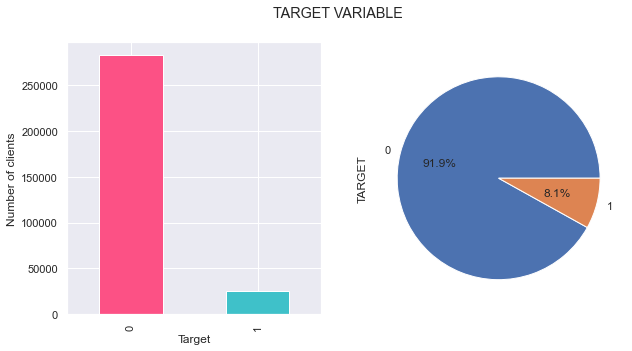

In [503]:
sns.set_theme(style='darkgrid')
data_im=APP_DATA['TARGET'].value_counts()
plt.subplot(1,2,1)
data_im.plot(kind='bar',color=['#FC5185','#3FC1C9'],figsize=(10,5),xlabel='Target',ylabel='Number of clients')
plt.subplot(1,2,2)
data_im.plot(kind='pie',labels=['0','1'],figsize=(10,5),autopct='%1.1f%%')
plt.suptitle('TARGET VARIABLE')

- As we can see in above graphs, it is clear that most of the clients repayed their loans. 
- Only 8.1% clients did not repay the loan or had difficulties with repaying.

## Plotting Distributions of variables

### 1) Application Data

#### Identifying categorical and continuous variables

In [504]:
APP_DATA.TARGET=APP_DATA.TARGET.astype('int64')

In [505]:
dtype_table=pd.DataFrame(APP_DATA.dtypes).reset_index() #datatypes of columns
dtype_table.columns=['columns','datatype']
print('float columns :',dtype_table['columns'][dtype_table.datatype=='float64'].count())
print('int columns :',dtype_table['columns'][dtype_table.datatype=='int64'].count())
print('object columns :',dtype_table['columns'][dtype_table.datatype=='object'].count())
print('float columns\n',dtype_table[dtype_table.datatype=='float64'])
print('int columns\n',dtype_table[dtype_table.datatype=='int64'])
print('object columns\n',dtype_table[dtype_table.datatype=='object'])

float columns : 23
int columns : 41
object columns : 13
float columns
                        columns datatype
7             AMT_INCOME_TOTAL  float64
8                   AMT_CREDIT  float64
9                  AMT_ANNUITY  float64
10             AMT_GOODS_PRICE  float64
16  REGION_POPULATION_RELATIVE  float64
19           DAYS_REGISTRATION  float64
21                 OWN_CAR_AGE  float64
29             CNT_FAM_MEMBERS  float64
41                EXT_SOURCE_1  float64
42                EXT_SOURCE_2  float64
43                EXT_SOURCE_3  float64
45              TOTALAREA_MODE  float64
46    OBS_30_CNT_SOCIAL_CIRCLE  float64
47    DEF_30_CNT_SOCIAL_CIRCLE  float64
48    OBS_60_CNT_SOCIAL_CIRCLE  float64
49    DEF_60_CNT_SOCIAL_CIRCLE  float64
50      DAYS_LAST_PHONE_CHANGE  float64
71  AMT_REQ_CREDIT_BUREAU_HOUR  float64
72   AMT_REQ_CREDIT_BUREAU_DAY  float64
73  AMT_REQ_CREDIT_BUREAU_WEEK  float64
74   AMT_REQ_CREDIT_BUREAU_MON  float64
75   AMT_REQ_CREDIT_BUREAU_QRT  float64
76  AMT_R

- As we can see, most of the integer columns are flagged which means they are categorical values.

In [506]:
# summary statistics of columns with datatype object.
object_table=APP_DATA.select_dtypes(include='object')
object_table.describe().T # Transposed resulting data set for a better view

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,307511,7,Unaccompanied,249818
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [507]:
# summary statistics of columns with datatype integer.
int_table=APP_DATA.select_dtypes(include='int64')
int_stats=int_table.describe().T.sort_values(by='std',ascending=False) # Transposed resulting data set for a better view
int_stats

,count,mean,std,min,25%,50%,75%,max
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
HOUR_APPR_PROCESS_START,307511.0,12.063419,3.265832,0.0,10.0,12.0,14.0,23.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
REGION_RATING_CLIENT,307511.0,2.052463,0.509034,1.0,2.0,2.0,2.0,3.0
REGION_RATING_CLIENT_W_CITY,307511.0,2.031521,0.502737,1.0,2.0,2.0,2.0,3.0
FLAG_DOCUMENT_3,307511.0,0.710023,0.453752,0.0,0.0,1.0,1.0,1.0
FLAG_PHONE,307511.0,0.281066,0.449521,0.0,0.0,0.0,1.0,1.0


- If wee look at max and min values in above table, expect DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH all other columns are categorical variables.
- DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH are in negative values just because they are relative to the day of application.
- But, DAYS_EMPLOYED has positive maximum value. There can be some error associated with it.

In [508]:
# summary statistics of columns with datatype float
float_table=APP_DATA.select_dtypes(include='float64')
float_stat=float_table.describe().T.reset_index()
float_stat.sort_values(by='std',ascending=False).head(15)

,index,count,mean,std,min,25%,50%,75%,max
1,AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
3,AMT_GOODS_PRICE,307511.0,538316.294367,369288.982246,40500.0,238500.0,450000.0,679500.0,4050000.0
0,AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
2,AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5
5,DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-24672.0,-7479.5,-4504.0,-2010.0,0.0
16,DAYS_LAST_PHONE_CHANGE,307511.0,-962.858119,826.807226,-4292.0,-1570.0,-757.0,-274.0,0.0
6,OWN_CAR_AGE,104582.0,12.061091,11.944812,0.0,5.0,9.0,15.0,91.0
12,OBS_30_CNT_SOCIAL_CIRCLE,306490.0,1.422245,2.400989,0.0,0.0,0.0,2.0,348.0
14,OBS_60_CNT_SOCIAL_CIRCLE,307511.0,1.400626,2.377224,0.0,0.0,0.0,2.0,344.0
22,AMT_REQ_CREDIT_BUREAU_YEAR,265992.0,1.899974,1.869295,0.0,0.0,1.0,3.0,25.0


- Top 7 columns in above table has very high standard deviation, which means those columns are very likely to have outliers.

#### Plotting continuous data and checking for outliers

In [509]:
def plot_dist(data,column,title) :
    sns.set_theme(style='white')
    plt.tight_layout()
    data.column=data[column].dropna()
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(data.column)
    plt.subplot(1,2,2)
    plt.suptitle(title)
    ax=sns.kdeplot(data[column].loc[data.TARGET==0],label='client : PAYMENT DONE ON TIME',color='#8BBEE8FF',shade=True)
    sns.kdeplot(data[column].loc[data.TARGET==1],label='client : WITH PAYMENT DIFFICULTIES',color='#D7A9E3FF',shade=True)
    ax.set_title('DISTRIBUTION BASED ON TARGET VARIABLE')
    ax.legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

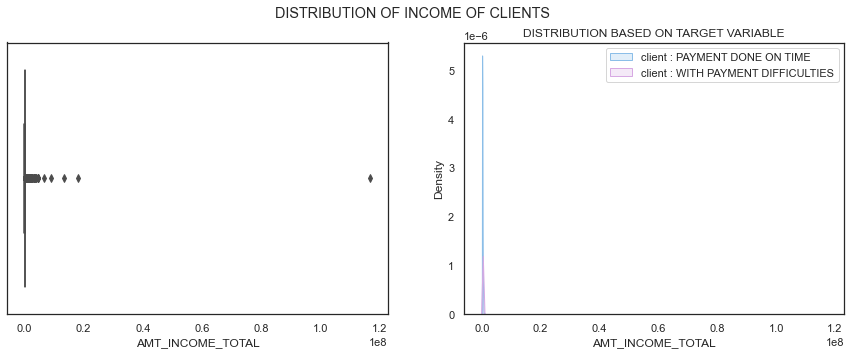

In [510]:
plot_dist(APP_DATA,'AMT_INCOME_TOTAL','DISTRIBUTION OF INCOME OF CLIENTS')

- from above graph we can clearly see that most of the income values concentrated around at on place.
- in box plot(left plot) it is clear that outliers(diamond shaped dots) exist.

<Figure size 432x288 with 0 Axes>

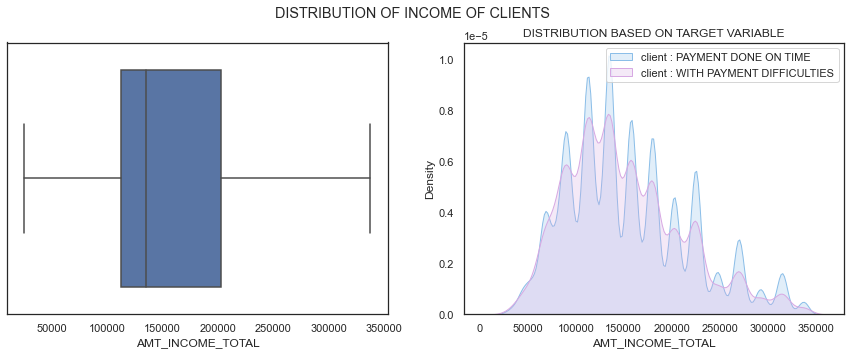

In [511]:
#### lets treat the outliers for better understanding of how income affecting the target variable
temp=APP_DATA
# Finding Inter Quartile range(IQR=Q3-Q1)[THIRD QUANTILE-FIRST QUANTILE]
Q1=temp['AMT_INCOME_TOTAL'].quantile(0.25)
Q3=temp['AMT_INCOME_TOTAL'].quantile(0.75)
IQR=Q3-Q1
# TRIMMING THE DATA(REMOVING OUTLIERS)
temp=temp[~((temp['AMT_INCOME_TOTAL']<(Q1-1.5*IQR)) | (temp['AMT_INCOME_TOTAL']>(Q3+1.5*IQR)))]
temp['AMT_INCOME_TOTAL']
plot_dist(temp,'AMT_INCOME_TOTAL','DISTRIBUTION OF INCOME OF CLIENTS')

- Removing the outliers gave us clear graph of income distribution.
- If we look at distribution data(right graph), it is right-skewed which means clients with higher income are more likely to repay the loan.

<Figure size 432x288 with 0 Axes>

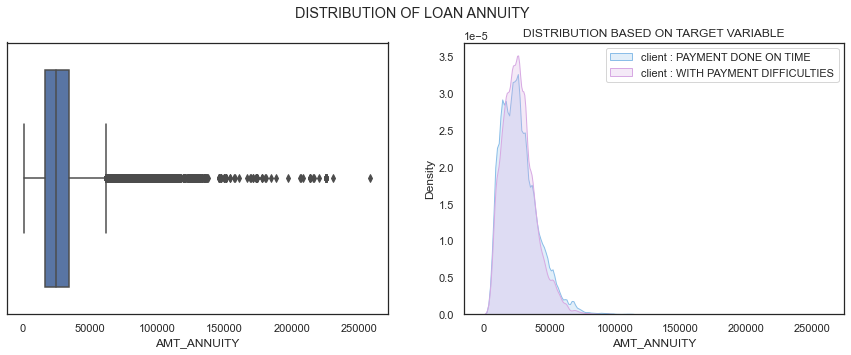

In [512]:
plot_dist(APP_DATA,'AMT_ANNUITY','DISTRIBUTION OF LOAN ANNUITY')

<Figure size 432x288 with 0 Axes>

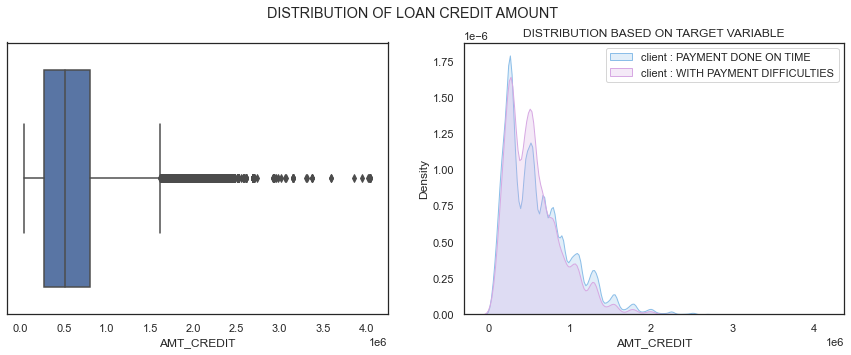

In [513]:
plot_dist(APP_DATA,'AMT_CREDIT','DISTRIBUTION OF LOAN CREDIT AMOUNT')

- Distribution of loan credit is also right skewed, thus indicating that client having payment difficulties mostly didn't opt/recieve higher amount of loan credit. Most of the clients with difficulties recieved loan credit are concentrated around mean and little more than the mean value.

<Figure size 432x288 with 0 Axes>

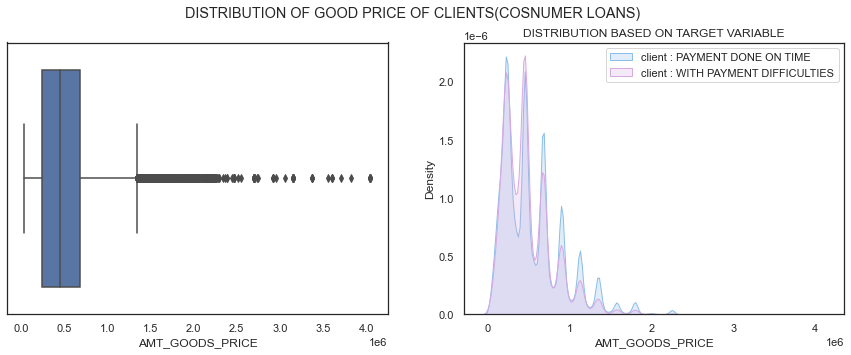

In [514]:
plot_dist(APP_DATA,'AMT_GOODS_PRICE','DISTRIBUTION OF GOOD PRICE OF CLIENTS(COSNUMER LOANS)')

- Plot of Goods price, is also similar to the case with loan credit.

<Figure size 432x288 with 0 Axes>

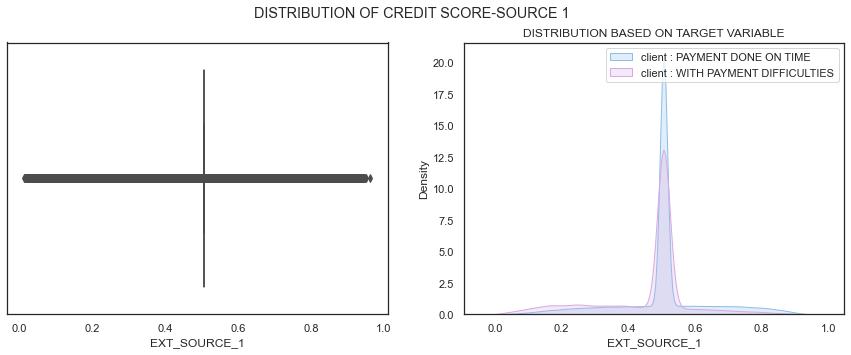

In [515]:
plot_dist(APP_DATA,'EXT_SOURCE_1','DISTRIBUTION OF CREDIT SCORE-SOURCE 1')

<Figure size 432x288 with 0 Axes>

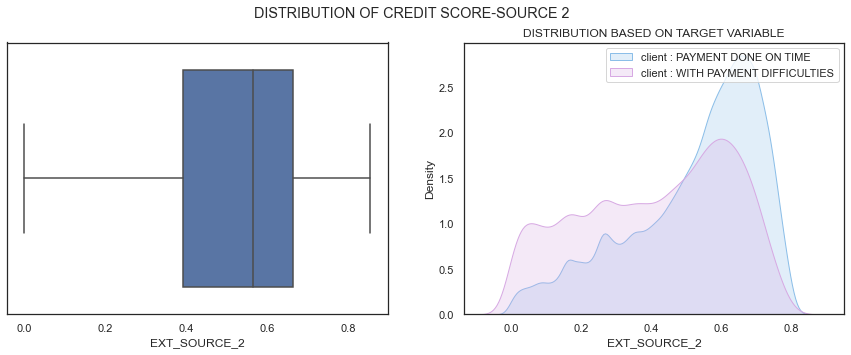

In [516]:
plot_dist(APP_DATA,'EXT_SOURCE_2','DISTRIBUTION OF CREDIT SCORE-SOURCE 2')

<Figure size 432x288 with 0 Axes>

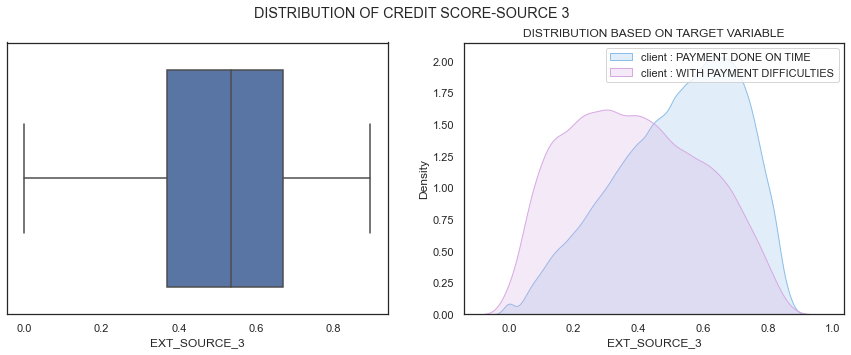

In [517]:
plot_dist(APP_DATA,'EXT_SOURCE_3','DISTRIBUTION OF CREDIT SCORE-SOURCE 3')

- If we look at External sources(credit bureaus) indication about clients(above 3 plots), clients with low credit score are more likely to be a defaulter.
- EXT_SOURCE gives us a clear distinction between clients with payment difficulties and clients who repaid graphs than any other distribution.

<Figure size 432x288 with 0 Axes>

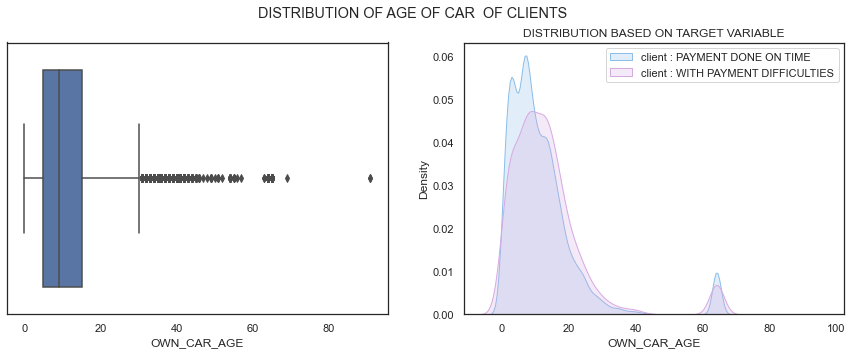

In [518]:
plot_dist(APP_DATA,'OWN_CAR_AGE','DISTRIBUTION OF AGE OF CAR  OF CLIENTS')

- If we look at the box plot of age of car there is an outlier with age above 80 years, it may be a error or there is a possibility that the car may be very old one.
- However, if we observe distribution, when the age of car is around median clients who repayed on time are higher in number than the clients who didnt repay.

<Figure size 432x288 with 0 Axes>

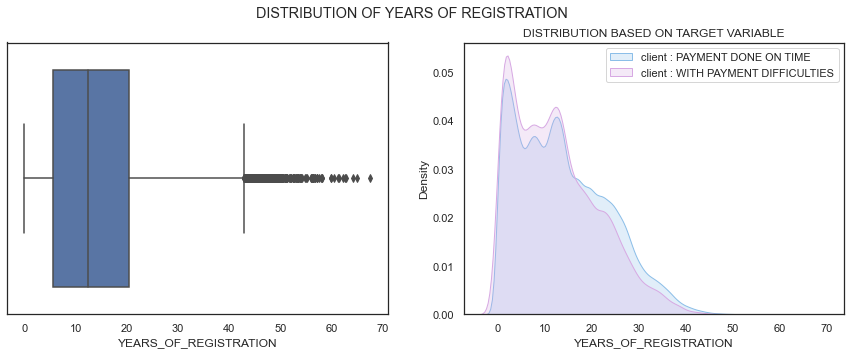

In [519]:
# converting days data to years for simplicity
APP_DATA['YEARS_OF_REGISTRATION']=(APP_DATA.DAYS_REGISTRATION/365)*(-1)
plot_dist(APP_DATA,'YEARS_OF_REGISTRATION','DISTRIBUTION OF YEARS OF REGISTRATION')

<Figure size 432x288 with 0 Axes>

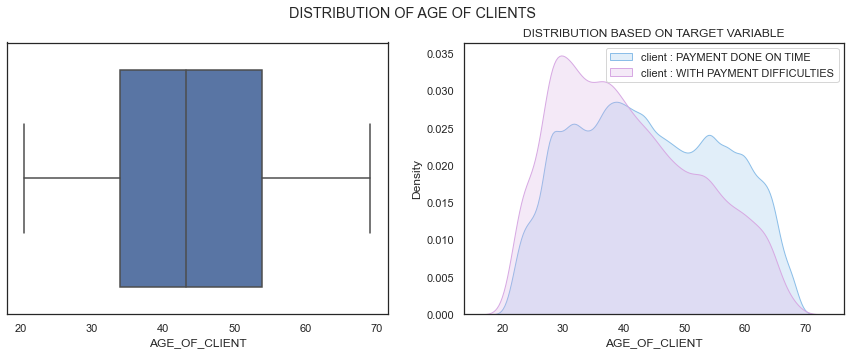

In [520]:
# converting days data to years for simplicity
APP_DATA['AGE_OF_CLIENT']=(APP_DATA.DAYS_BIRTH/365)*(-1)
plot_dist(APP_DATA,'AGE_OF_CLIENT','DISTRIBUTION OF AGE OF CLIENTS')

<Figure size 432x288 with 0 Axes>

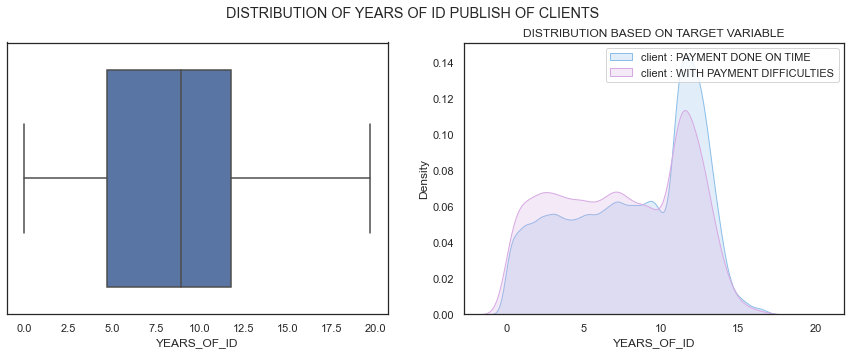

In [521]:
APP_DATA['YEARS_OF_ID']=(APP_DATA.DAYS_ID_PUBLISH/365)*(-1)
plot_dist(APP_DATA,'YEARS_OF_ID','DISTRIBUTION OF YEARS OF ID PUBLISH OF CLIENTS')

<Figure size 432x288 with 0 Axes>

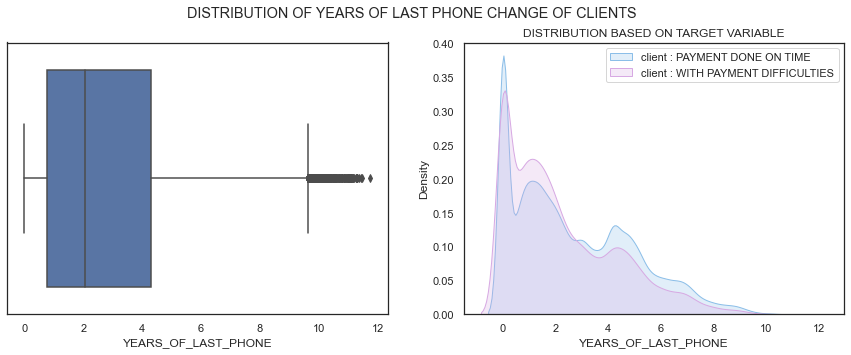

In [522]:
APP_DATA['YEARS_OF_LAST_PHONE']=(APP_DATA.DAYS_LAST_PHONE_CHANGE/365)*(-1)
plot_dist(APP_DATA,'YEARS_OF_LAST_PHONE','DISTRIBUTION OF YEARS OF LAST PHONE CHANGE OF CLIENTS')

- Clients who are of young age around 20-35 age group has higher number of people who didnt repay the loan. 
- Clients who changed mobile and got their ID published has higher number of defaulters.

<Figure size 432x288 with 0 Axes>

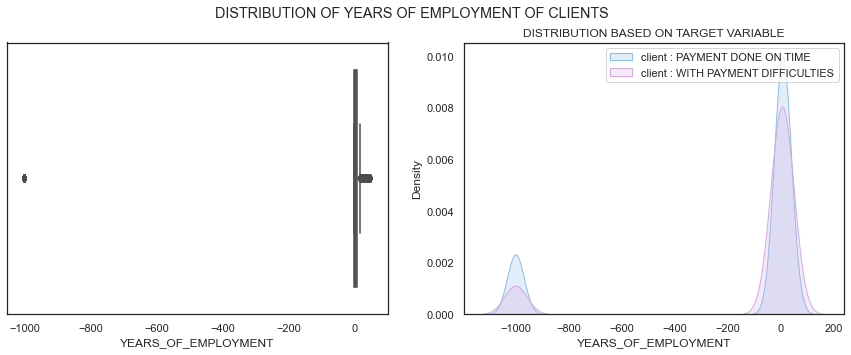

In [523]:
# converting days data to years for simplicity
APP_DATA['YEARS_OF_EMPLOYMENT']=(APP_DATA.DAYS_EMPLOYED/365)*(-1)
plot_dist(APP_DATA,'YEARS_OF_EMPLOYMENT','DISTRIBUTION OF YEARS OF EMPLOYMENT OF CLIENTS')

- Years of employment has wierd graph. As suspected earlier, years of employement has some error associated with it.
- Years of emploment data has negative values and has 1000 years which are surely the errors(outliers).
- we can just remove the negative data or if possible find the reason behind the error.

<Figure size 432x288 with 0 Axes>

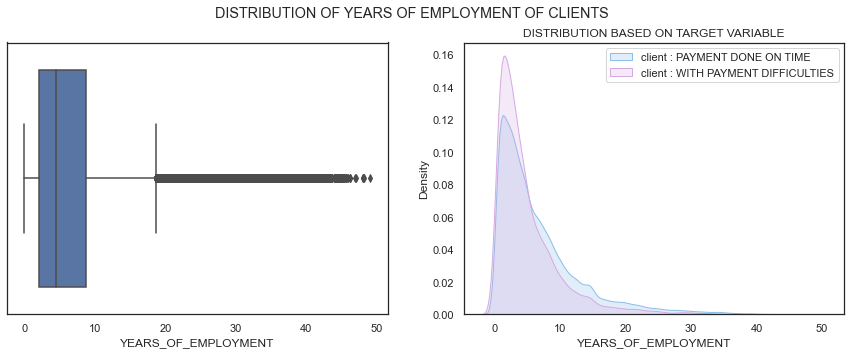

In [524]:
# lets plot positive data of YEARS OF EMPLOYMENT
APP_DATA['YEARS_OF_EMPLOYMENT']=APP_DATA['YEARS_OF_EMPLOYMENT'][APP_DATA['YEARS_OF_EMPLOYMENT']>=0]
plot_dist(APP_DATA,'YEARS_OF_EMPLOYMENT','DISTRIBUTION OF YEARS OF EMPLOYMENT OF CLIENTS')

- As we can see, clients with less years of employment are more likely to be defaulters.

<Figure size 432x288 with 0 Axes>

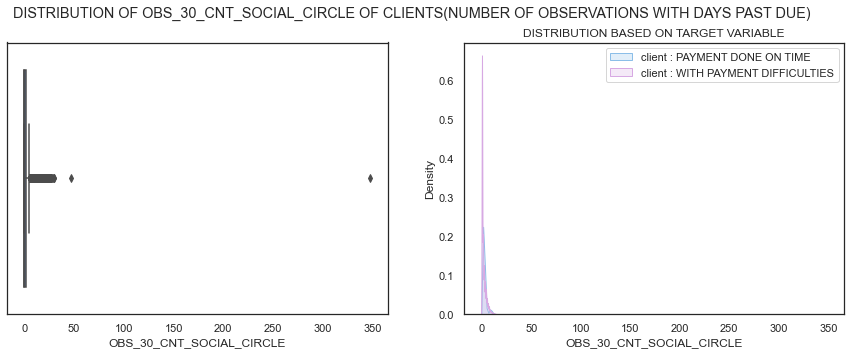

<Figure size 432x288 with 0 Axes>

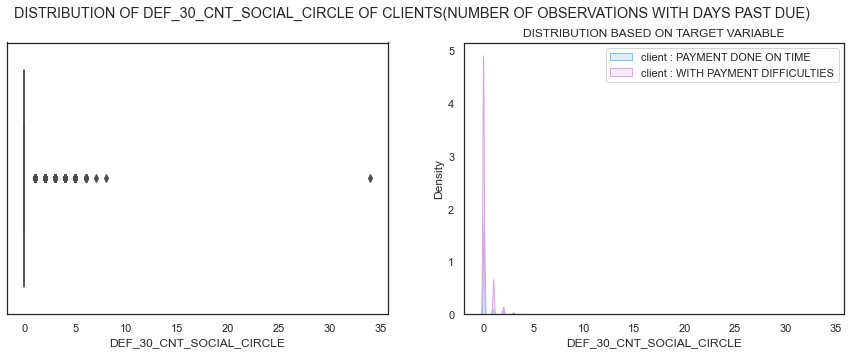

<Figure size 432x288 with 0 Axes>

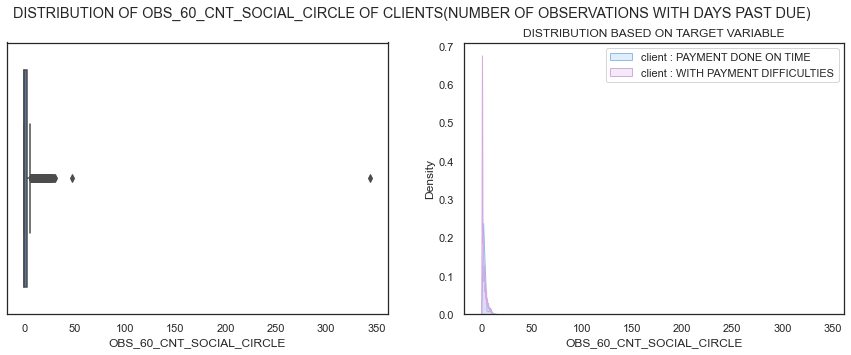

<Figure size 432x288 with 0 Axes>

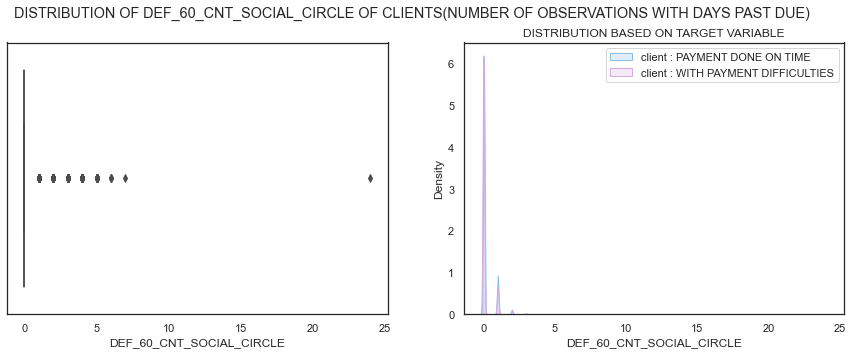

In [525]:
columns=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
for column in columns :
    plot_dist(APP_DATA,column,title='DISTRIBUTION OF '+column+ ' OF CLIENTS(NUMBER OF OBSERVATIONS WITH DAYS PAST DUE)')

- The distribution of number of people defaulted or didnt repay loan since 30 days past due/60 days past due around client's surroundings clearly indicates that presence of defaulters in the social circle can indicate thhat client can be a defaulter.
- we can see that in above distribution graphs, clients mostly surrounding with 0 or very less number of defaulters has more probability that client can be a defaulter.

<Figure size 432x288 with 0 Axes>

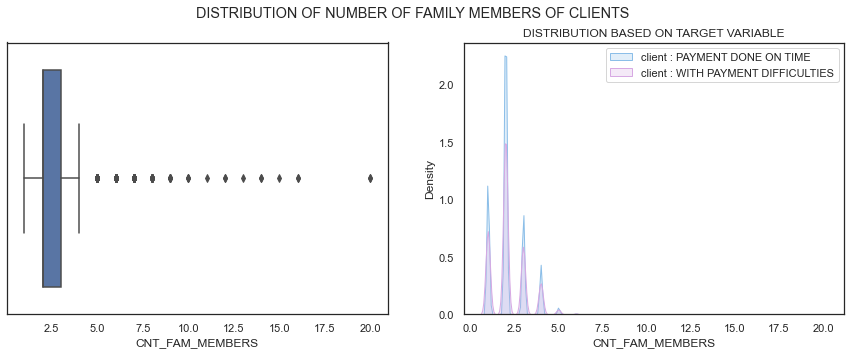

In [526]:
plot_dist(APP_DATA,'CNT_FAM_MEMBERS','DISTRIBUTION OF NUMBER OF FAMILY MEMBERS OF CLIENTS')

- Clients who are having only 2 members of familiy has higher number of people who repayed loans than who didnt.

<Figure size 432x288 with 0 Axes>

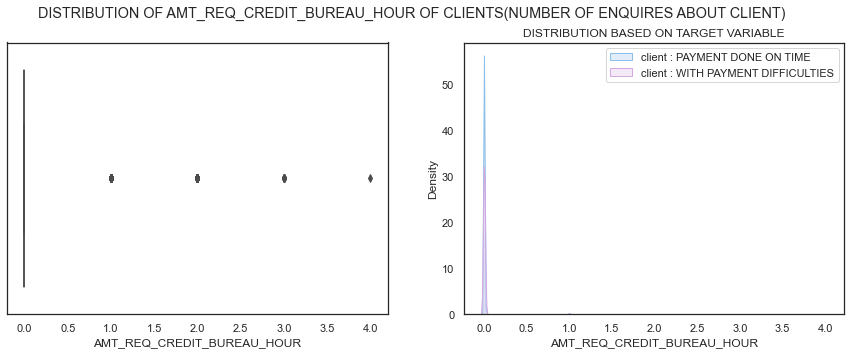

<Figure size 432x288 with 0 Axes>

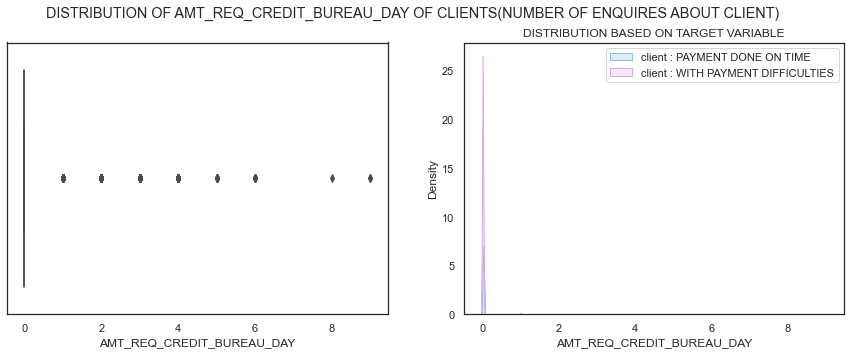

<Figure size 432x288 with 0 Axes>

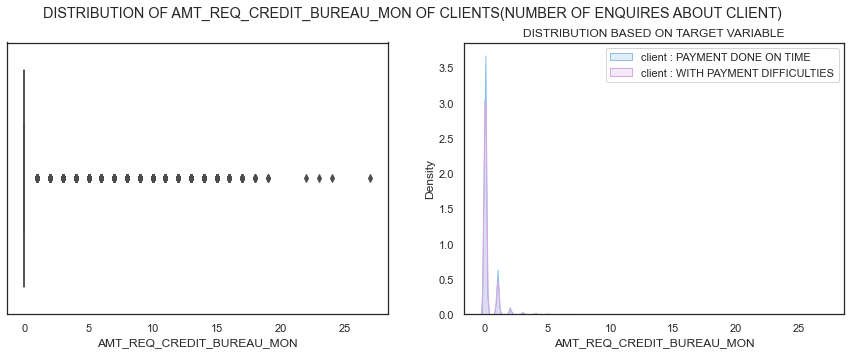

<Figure size 432x288 with 0 Axes>

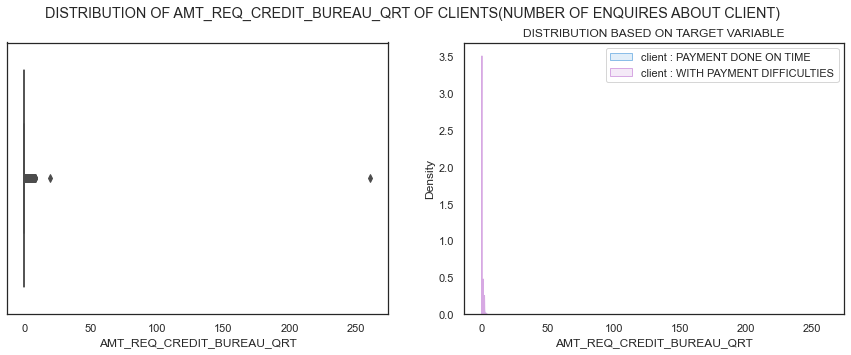

<Figure size 432x288 with 0 Axes>

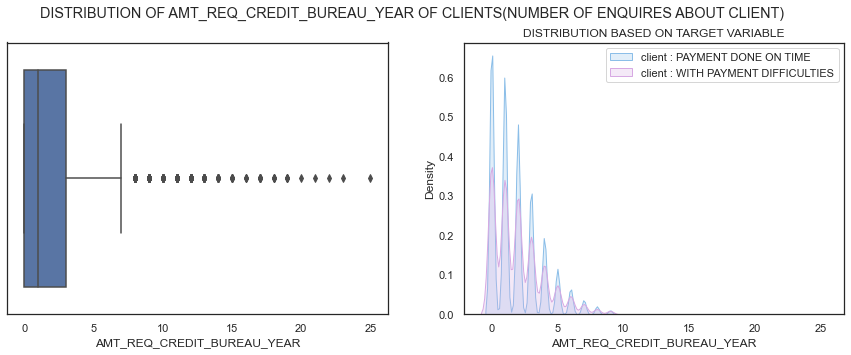

In [527]:
COL=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',]
for column in COL :
    plot_dist(APP_DATA,column,title='DISTRIBUTION OF '+column+ ' OF CLIENTS(NUMBER OF ENQUIRES ABOUT CLIENT)')

- If we analsye above enquires distribution, we can say that less number of enquires has higher possibility of client being defaulter.

<Figure size 432x288 with 0 Axes>

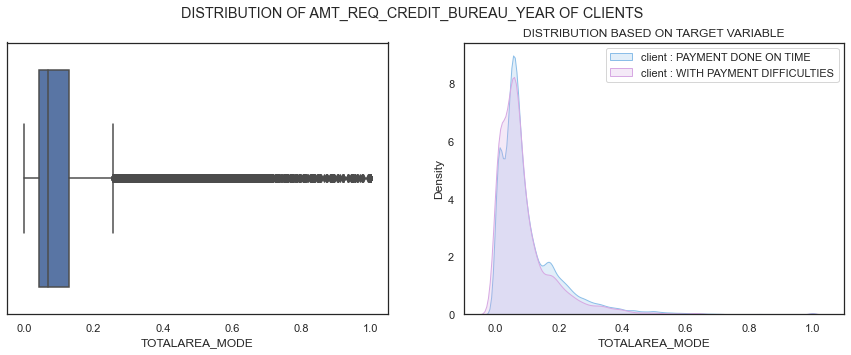

In [528]:
plot_dist(APP_DATA,'TOTALAREA_MODE',title='DISTRIBUTION OF '+column+ ' OF CLIENTS')

- Distrbution of total area of apartment data has no clear pattern and curves of clients who repaid laon and has difficulties overlapped.

#### Plotting categorical variables

In [529]:
def plot_categorical(data,column,title):
    plt.figure(figsize=(15,5))
    sns.countplot(data[column],hue=APP_DATA.TARGET)
    plt.title(title,fontweight='bold',fontsize=15)
    plt.xticks(rotation=90)
    plt.legend(['0','1'],loc='upper right')
    plt.show()
    plt.close()

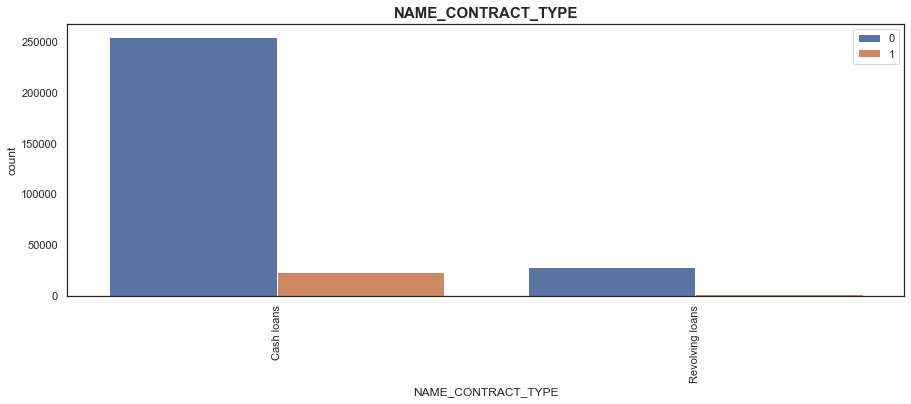

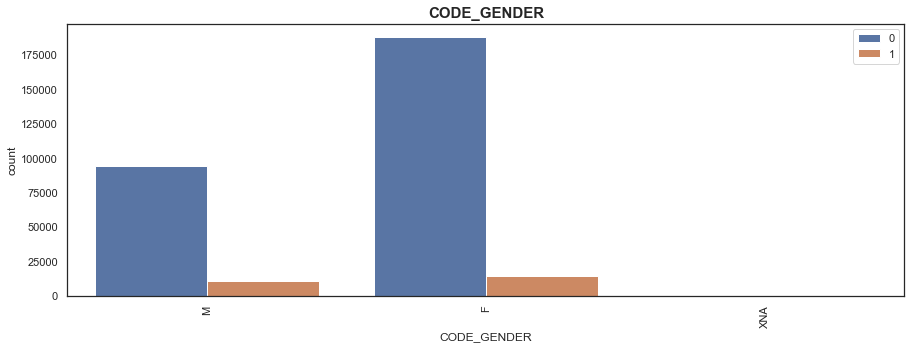

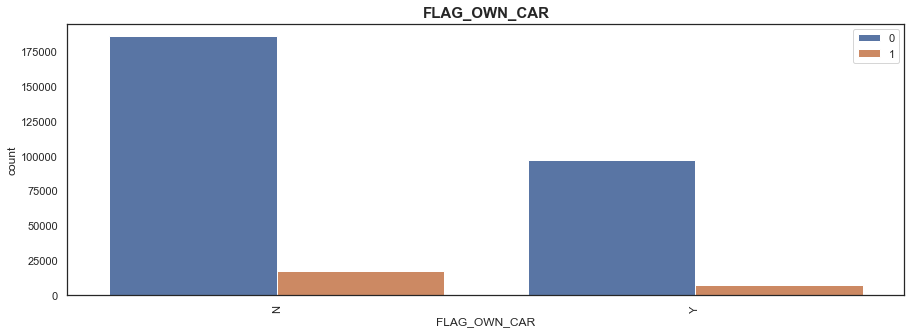

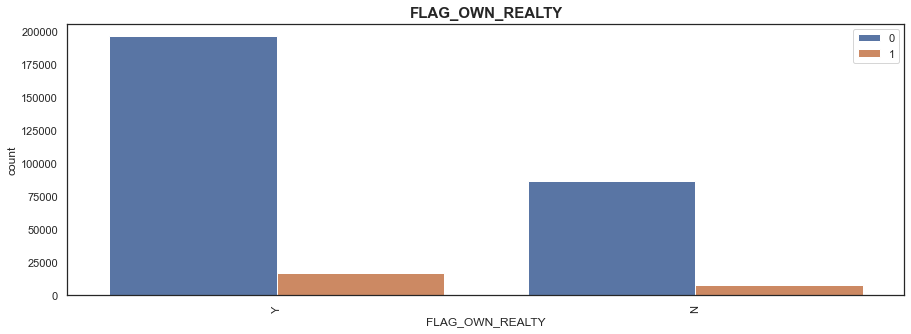

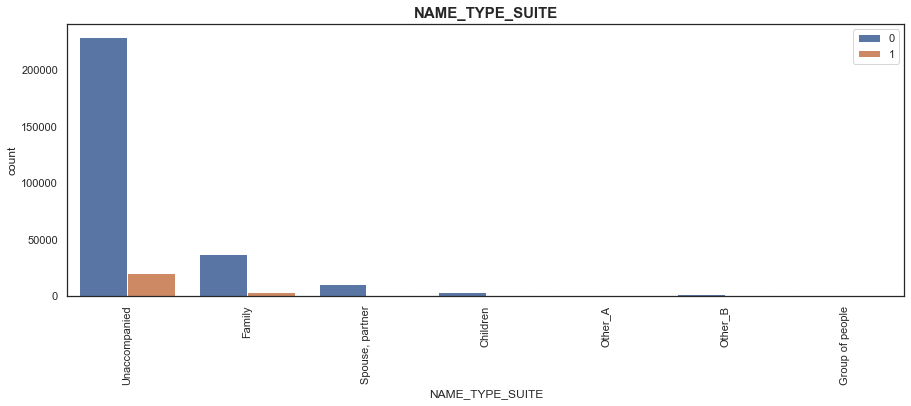

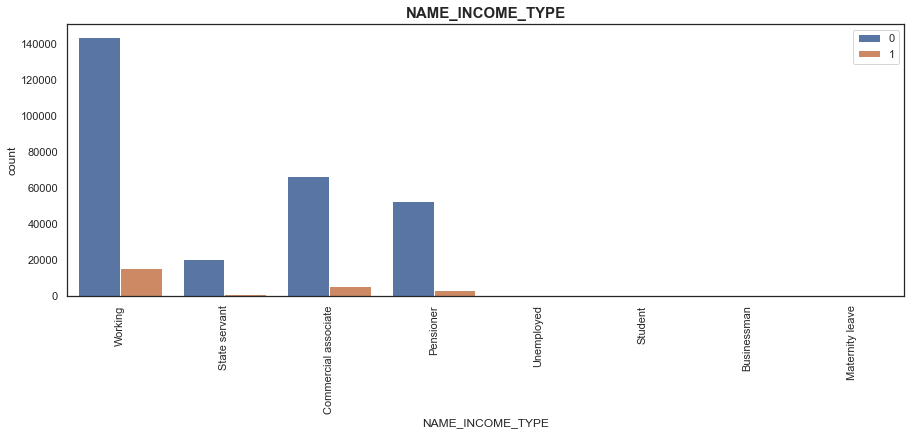

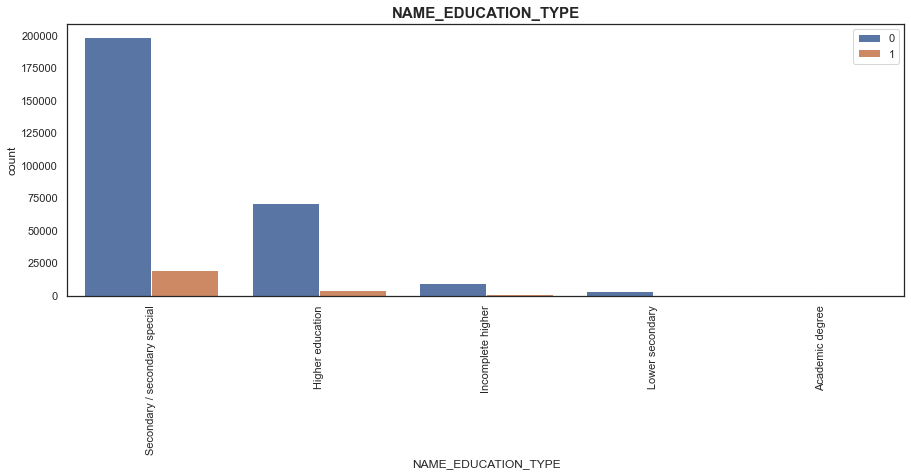

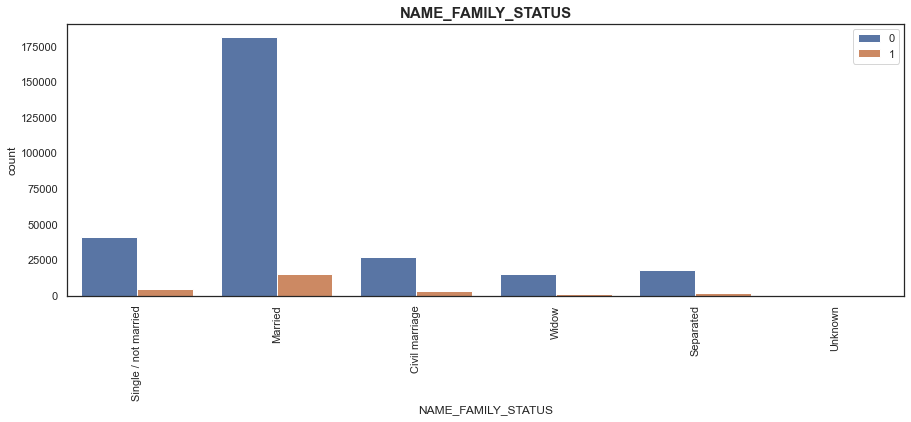

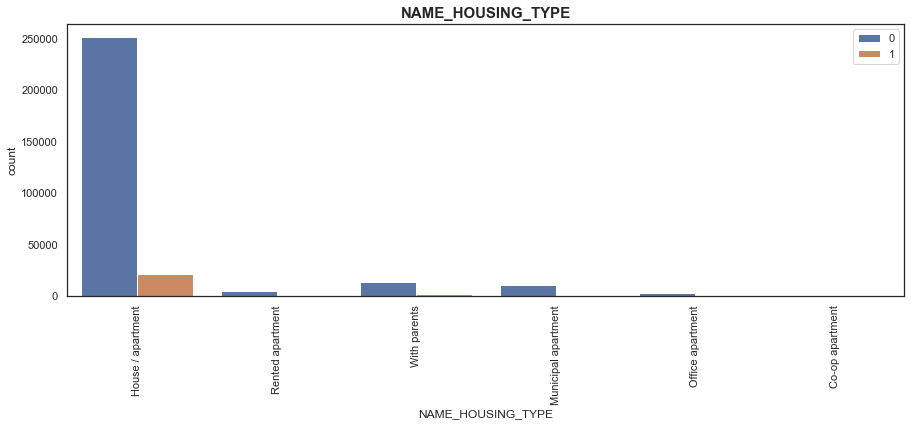

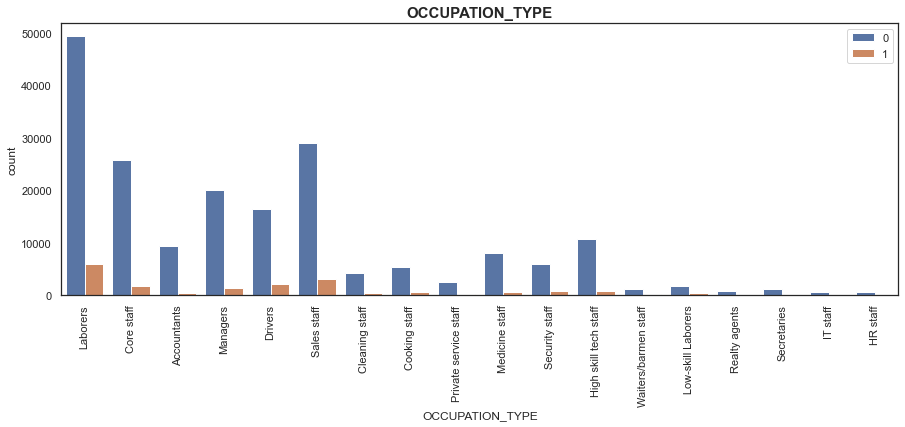

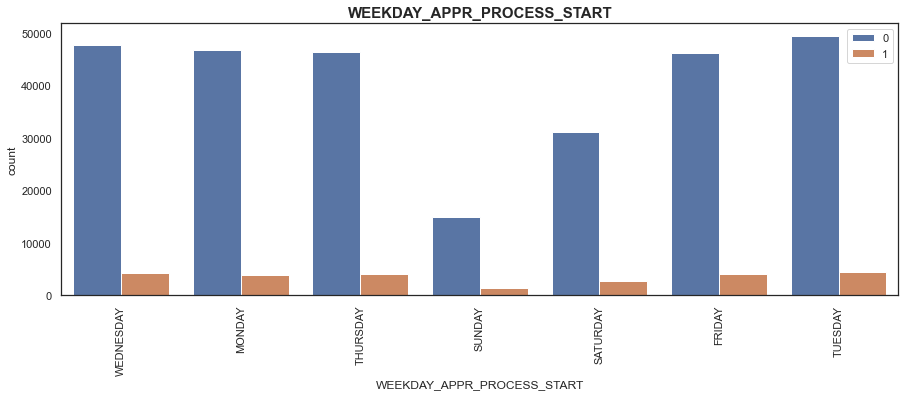

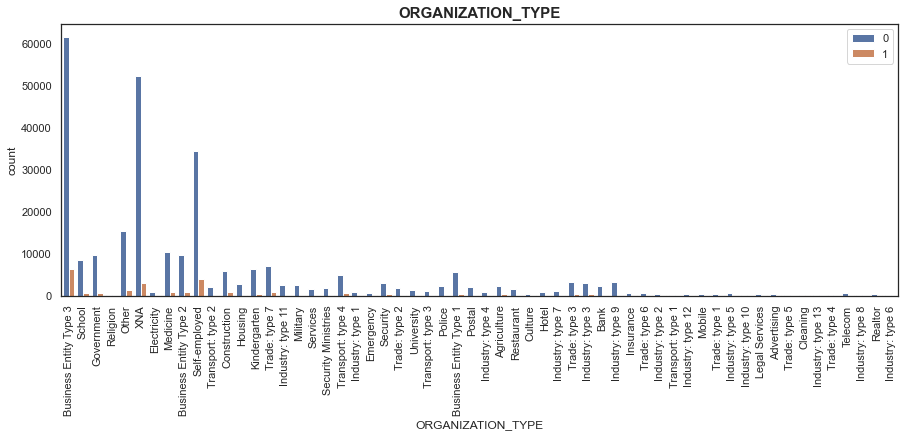

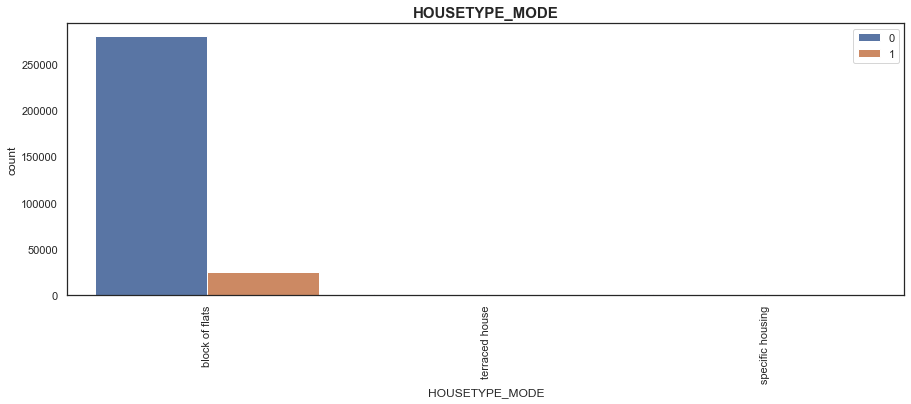

In [530]:
columns=list(object_table.columns)
for column in columns:
   plot_categorical(APP_DATA,column,title=column)

- clients who repayed on time and those who had payment difficulies both mostly opted for cash loans than revolving loans.
- Among defaulters, 
    * females are more in number than males.
    * Clients who didnt own car are more in number than who own car.
    * Clients who own house/flat are more in number than who didnt own house/flat.
    * Clients who are not accompanied by any of the staff has higher number of deaulters.
    * Clients with secondary eductaion are more in number than other higher education.
    * Married people are more in number than who are single,widow,divorced or civil marriage.
    *
- state servents are less likely to be a defaulter.
- Clients who own house consists of 90% clients who opted for loan and defaulters are also mostly from clients who own house than who live with parents or any other hosue type.
- Clients who are laborers and sales staff consists of higher percentage clients who opted for loan and defaulters are also mostly from clients who own laborers and sales staff.
- Clients who are from business type Business Enity type 3, XNA and self-employed consists of higher percentage clients who opted for loan and defaulters are also mostly from clients who are from Business Enity type 3, self-employed and XNA.

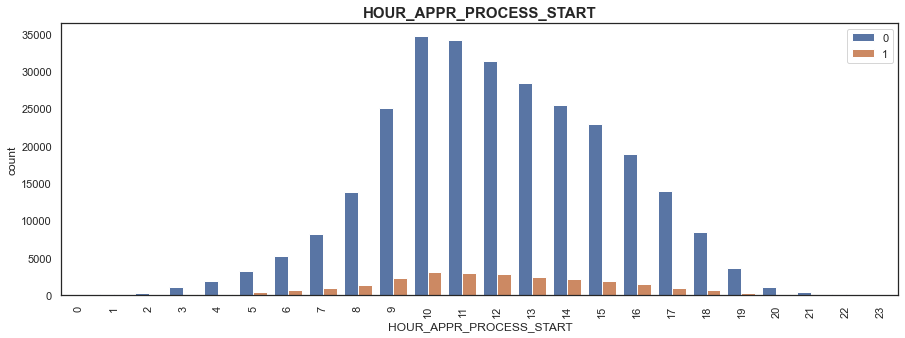

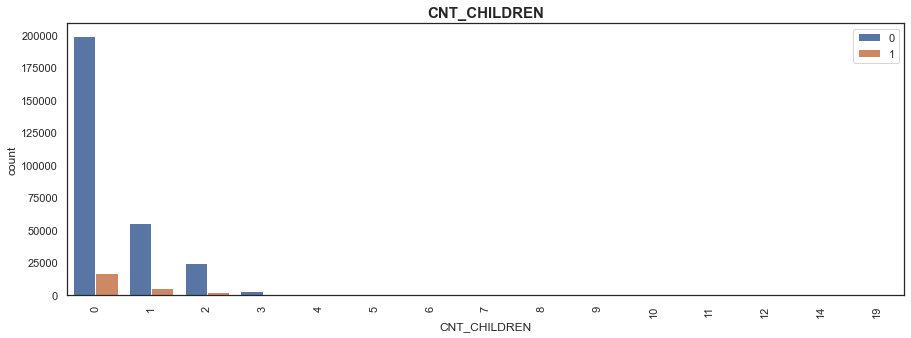

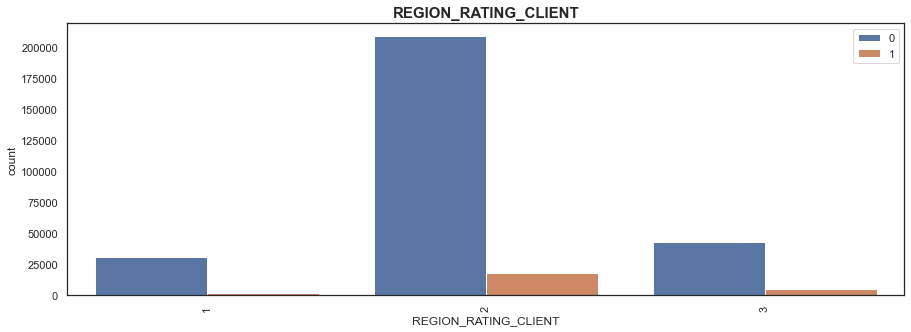

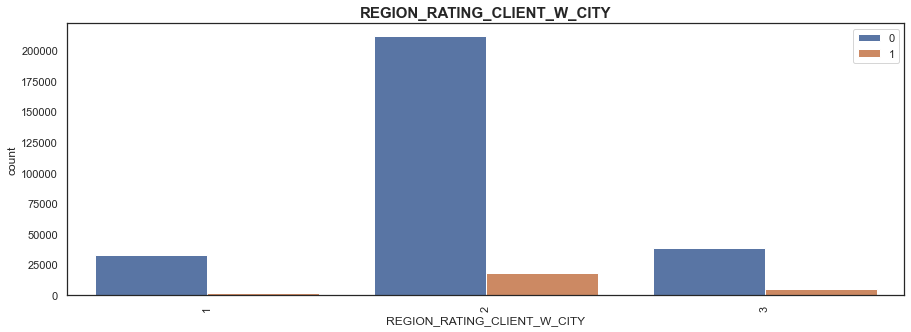

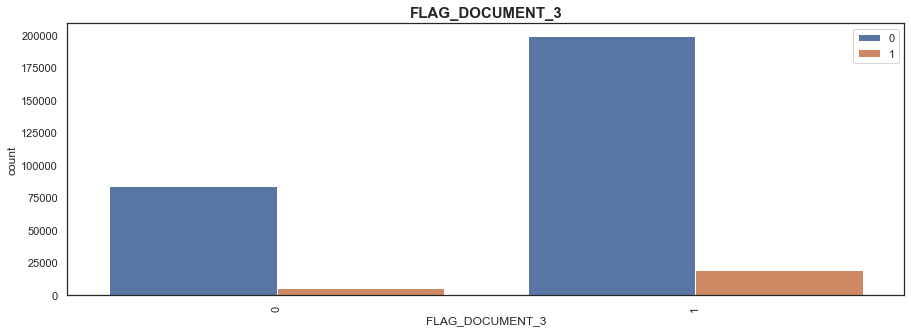

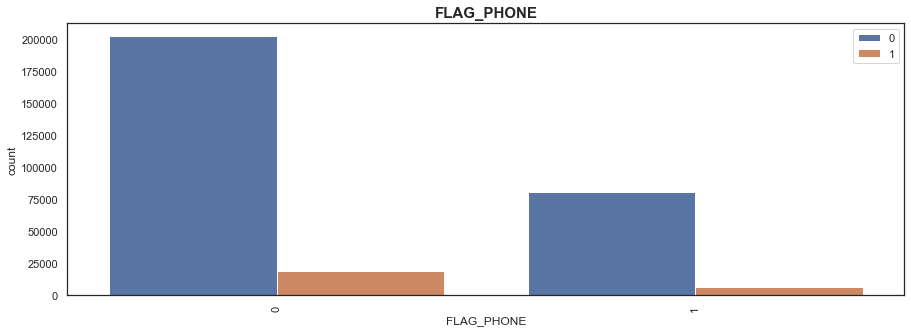

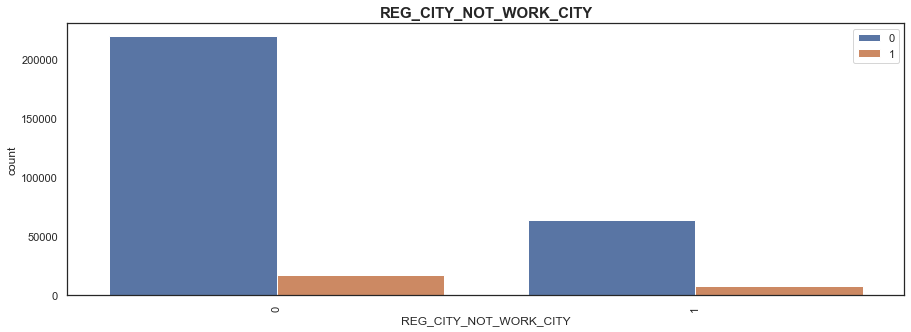

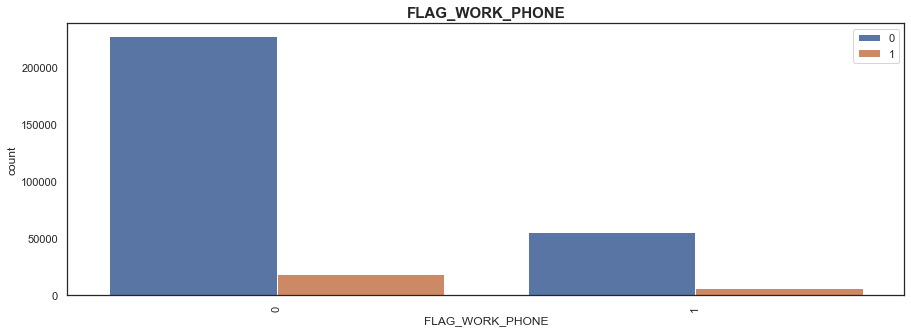

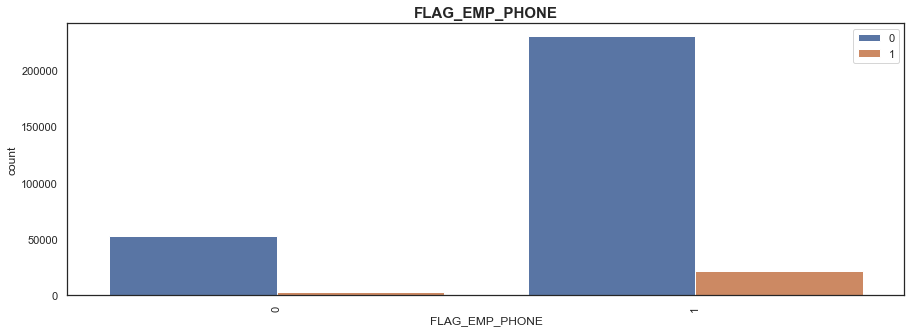

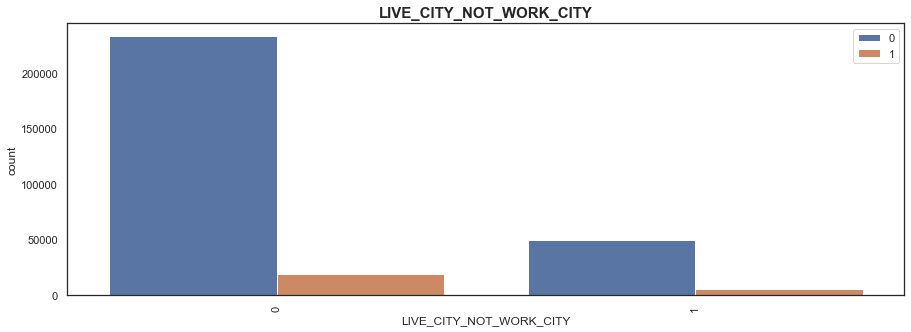

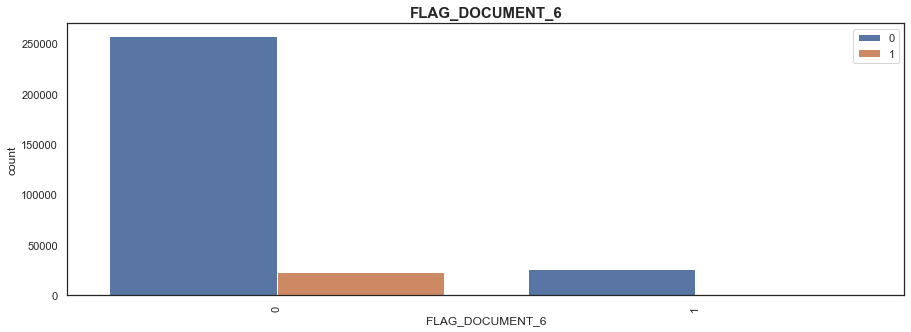

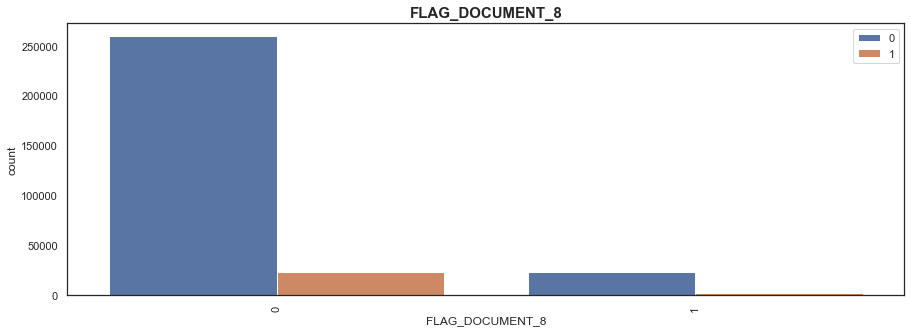

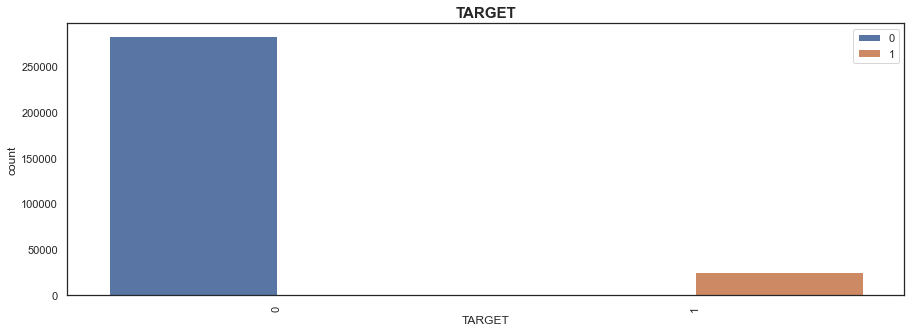

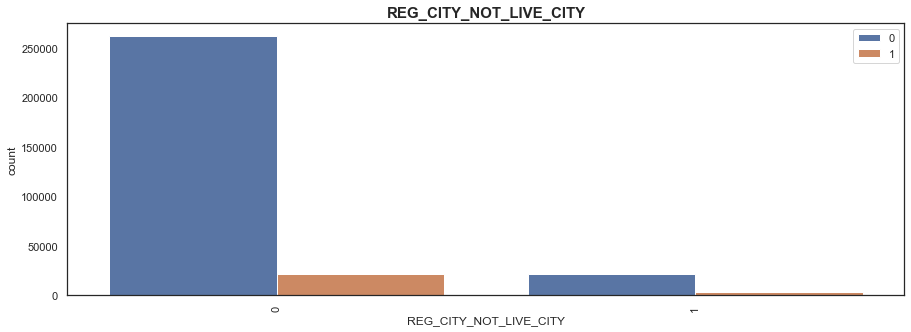

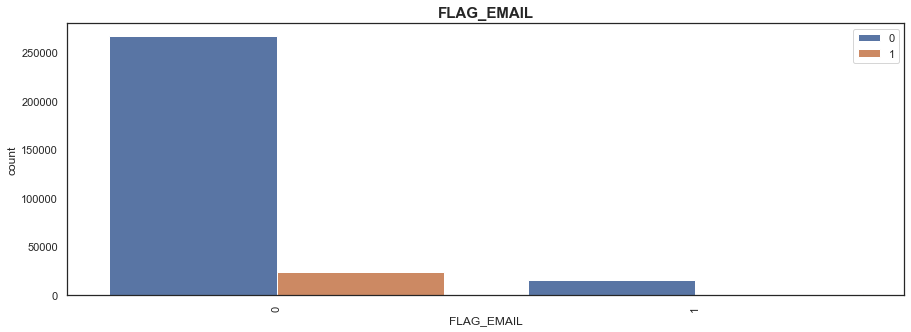

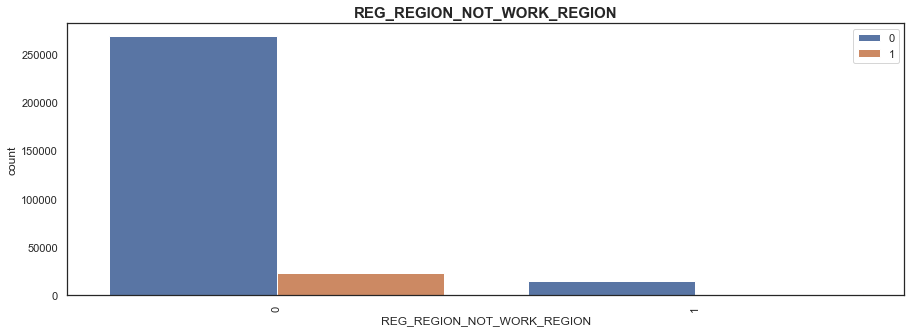

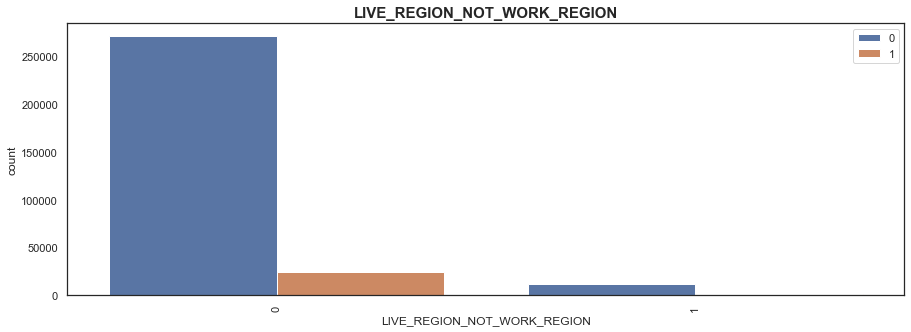

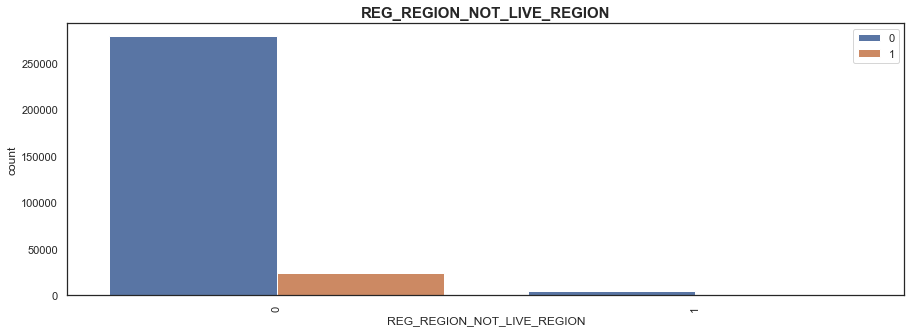

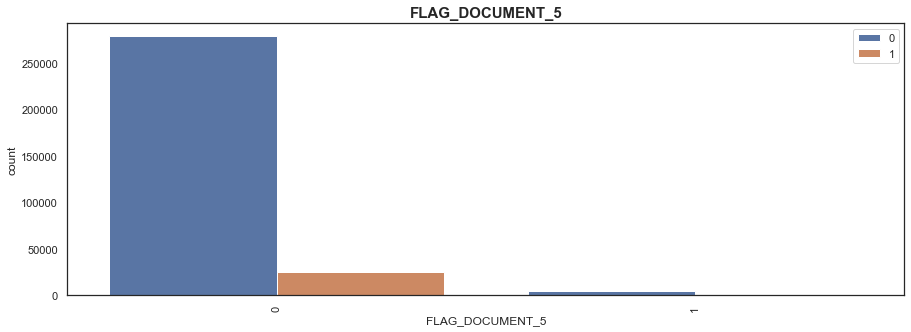

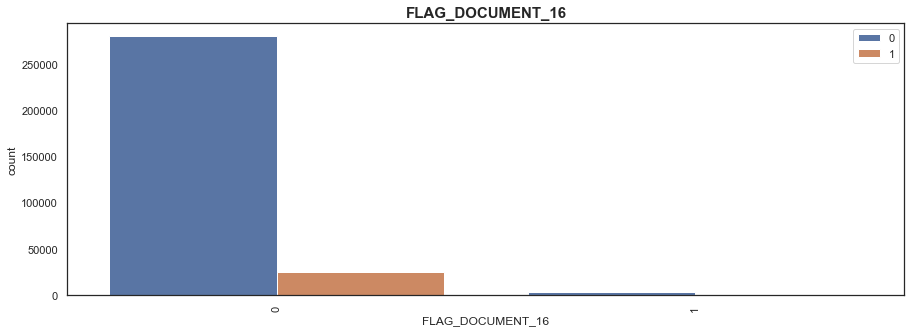

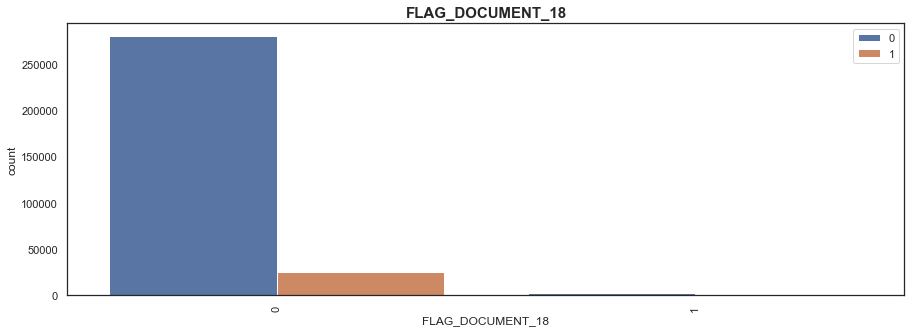

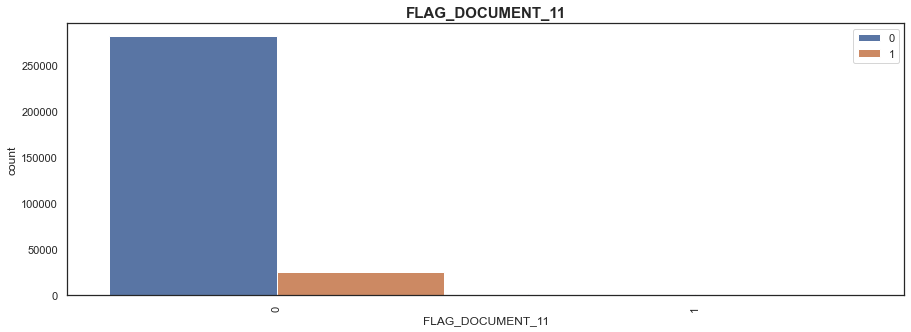

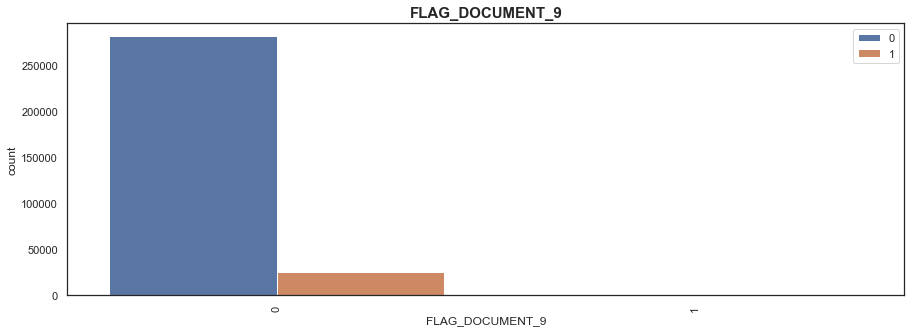

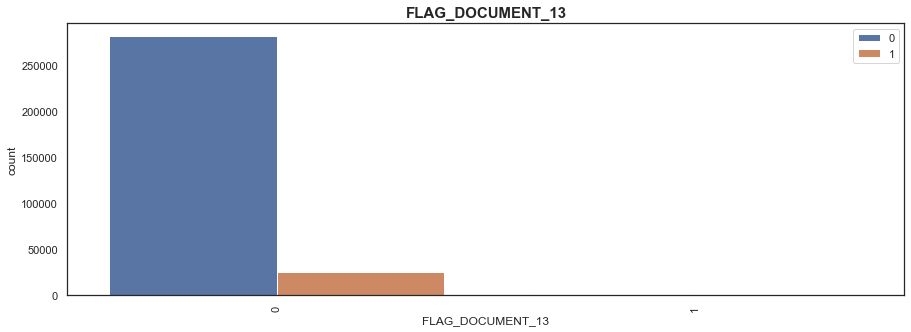

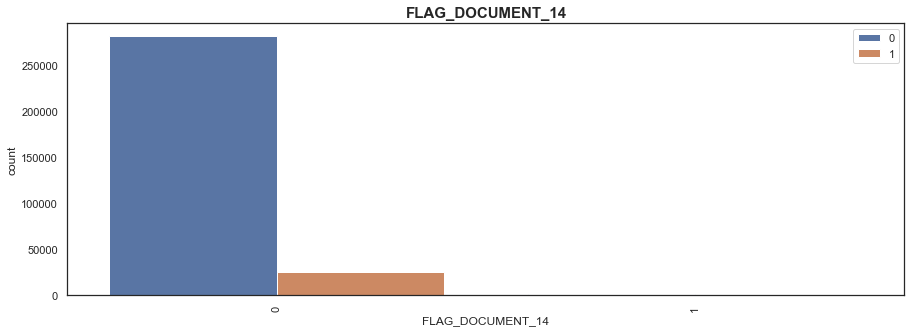

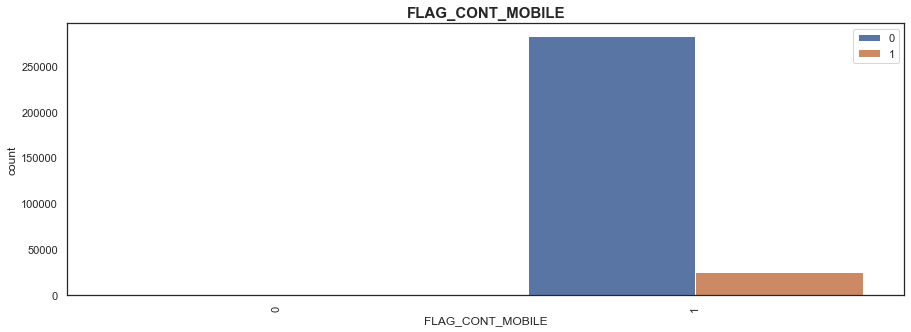

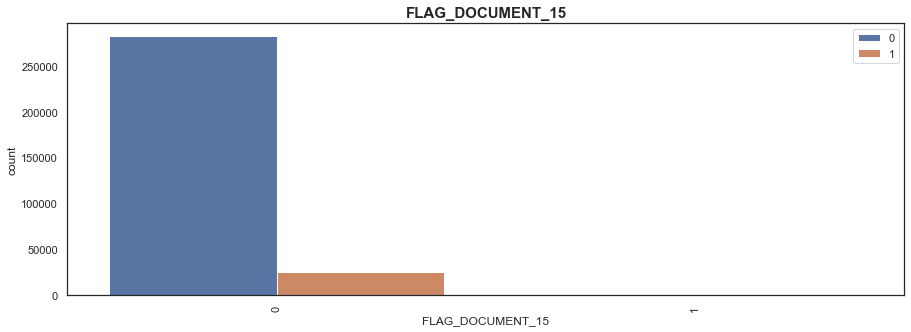

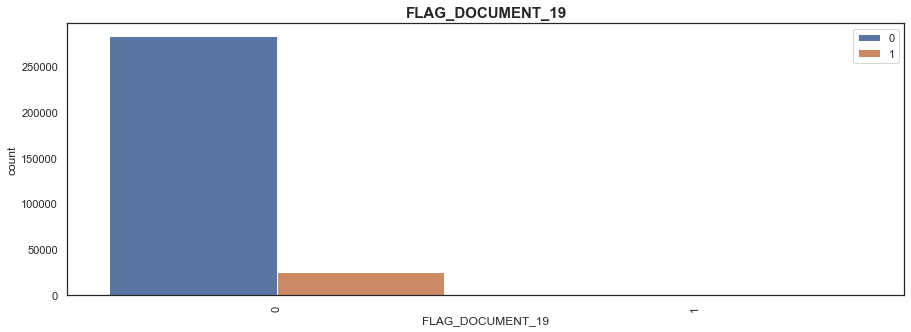

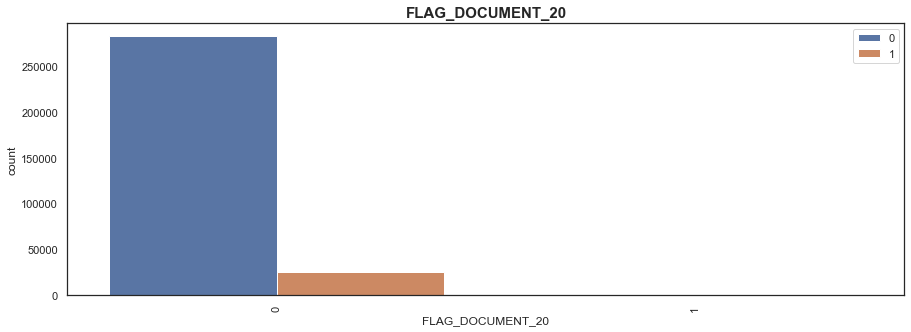

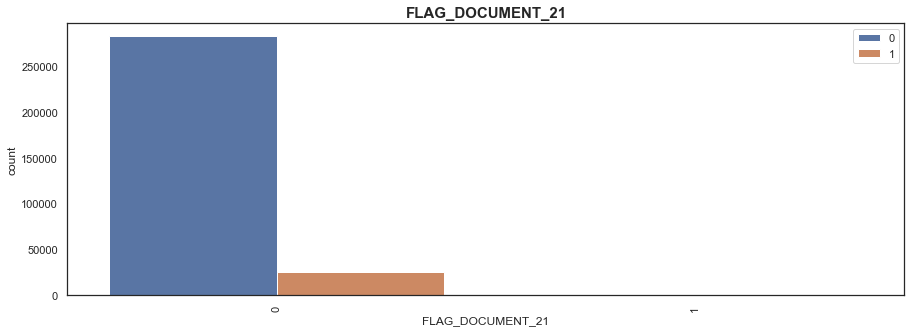

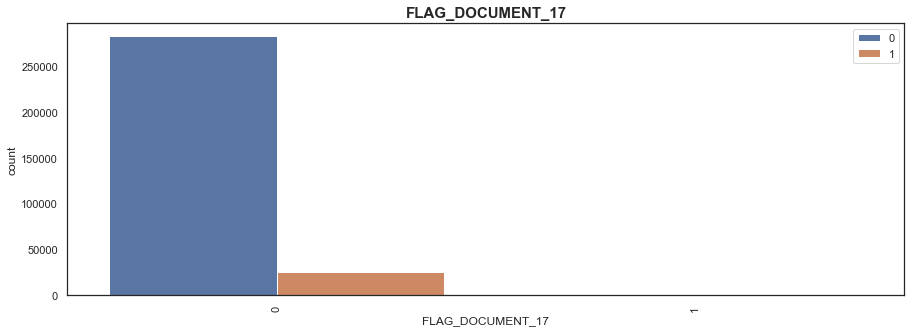

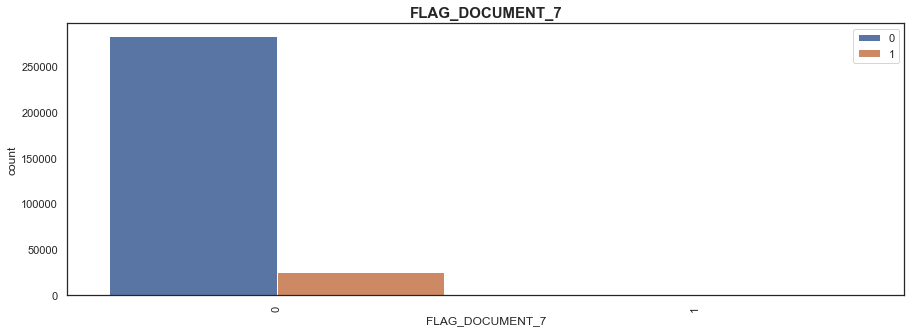

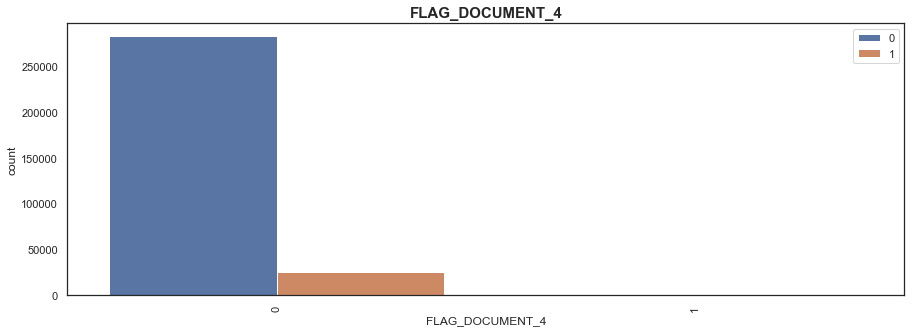

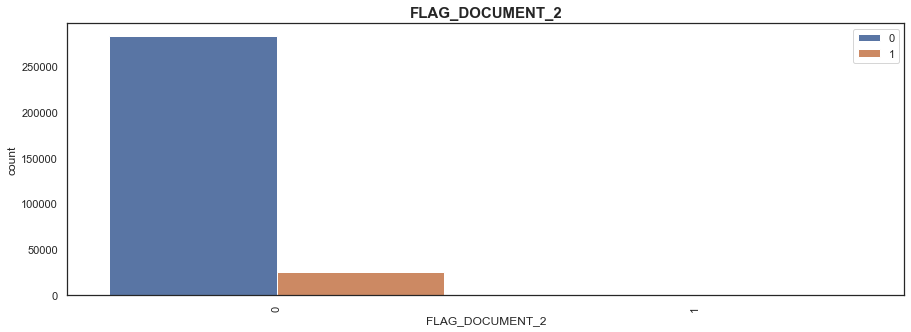

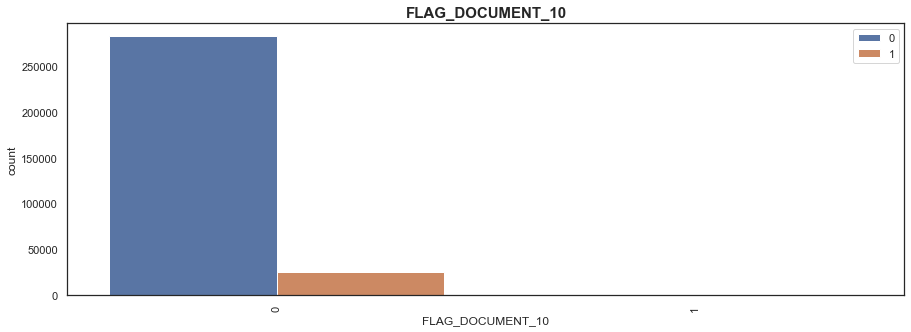

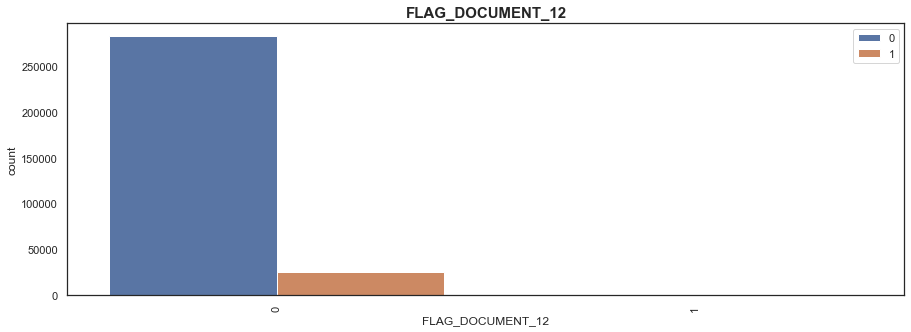

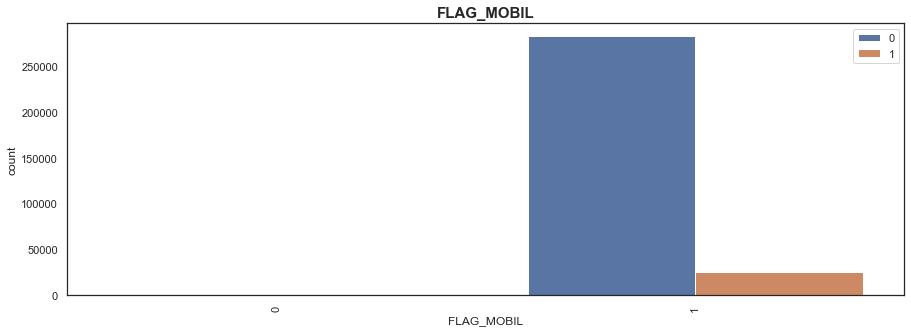

In [531]:
col=list(int_stats.index[4:])
for column in col:
   plot_categorical(APP_DATA,column,title=column)

- clients with no childer mostly opted for loan and also has higher number of defaulters.
- client who live in region and city rating with 1 and 3 mostly repayed their loans and from region and city with rating has higher number of applicants but defaulters are also high.
- Defaulters didnt provide their email or home phone and their permanent address(city and region) is mostly same as work place address and current living address

#### Finding Co-relation between variables.

In [532]:
correlation_data=pd.DataFrame(APP_DATA.corr()['TARGET'])
correlation_data.columns=['correlation']
correlation_data=correlation_data.reset_index().sort_values(by='correlation',ascending=False)

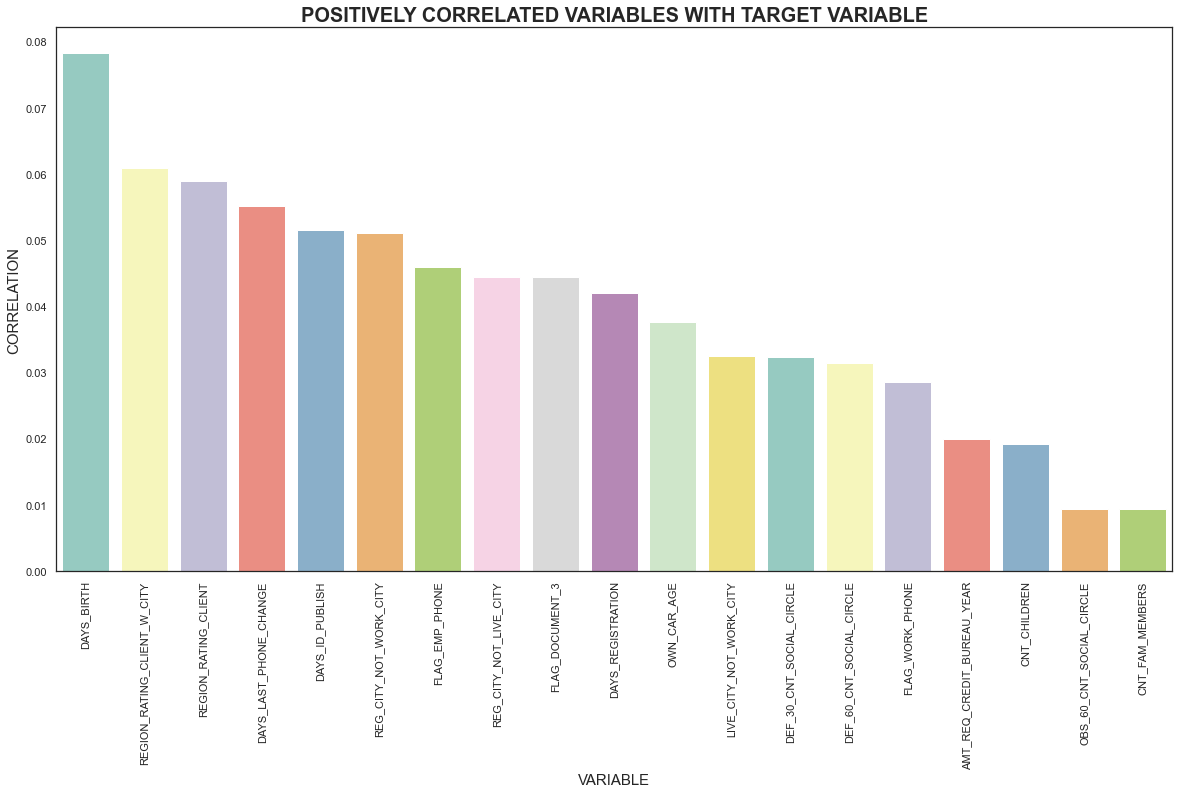

In [533]:
#FEATURES WITH HIGHEST CORRELATION WITH TARGET VARIABLE
correlation_data.head(20)
plt.figure(figsize=(20,10))
sns.barplot(y='correlation',x='index',data=correlation_data[1:20],palette='Set3')
plt.xticks(rotation=90)
plt.title('POSITIVELY CORRELATED VARIABLES WITH TARGET VARIABLE',fontweight='bold',fontsize=20)
plt.xlabel('VARIABLE',fontsize=15)
plt.ylabel('CORRELATION',fontsize=15)
plt.show()

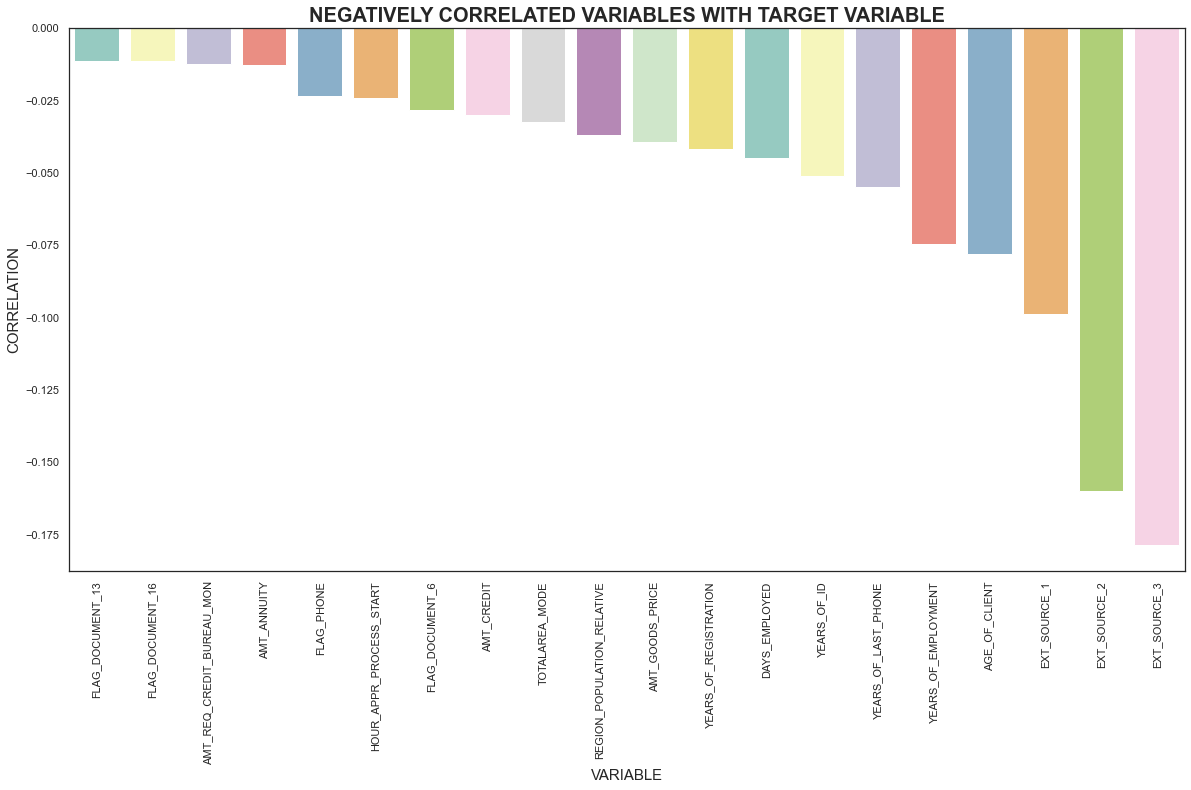

In [534]:
#FEATURES WITH LOWEST/NEGATIVE CORRELATION WITH TARGET VARIABLE
plt.figure(figsize=(20,10))
sns.barplot(y='correlation',x='index',data=correlation_data.tail(20),palette='Set3')
plt.xticks(rotation=90)
plt.title('NEGATIVELY CORRELATED VARIABLES WITH TARGET VARIABLE',fontweight='bold',fontsize=20)
plt.xlabel('VARIABLE',fontsize=15)
plt.ylabel('CORRELATION',fontsize=15)
plt.show()

### 2) PREVIOUS APPLICATION DATA

#### Identifying categorical and continuous data

In [535]:
#datatypes of columns
dtype_table_prev=pd.DataFrame(prev_app.dtypes).reset_index() 
dtype_table_prev.columns=['columns','datatype']
print('float columns :',dtype_table_prev['columns'][dtype_table_prev.datatype=='float64'].count())
print('int columns :',dtype_table_prev['columns'][dtype_table_prev.datatype=='int64'].count())
print('object columns :',dtype_table_prev['columns'][dtype_table_prev.datatype=='object'].count())
print('float columns\n',dtype_table_prev[dtype_table_prev.datatype=='float64'])
print('int columns\n',dtype_table_prev[dtype_table_prev.datatype=='int64'])
print('object columns\n',dtype_table_prev[dtype_table_prev.datatype=='object'])

float columns : 13
int columns : 6
object columns : 16
float columns
                       columns datatype
3                 AMT_ANNUITY  float64
4             AMT_APPLICATION  float64
5                  AMT_CREDIT  float64
6            AMT_DOWN_PAYMENT  float64
7             AMT_GOODS_PRICE  float64
12          RATE_DOWN_PAYMENT  float64
26                CNT_PAYMENT  float64
29         DAYS_FIRST_DRAWING  float64
30             DAYS_FIRST_DUE  float64
31  DAYS_LAST_DUE_1ST_VERSION  float64
32              DAYS_LAST_DUE  float64
33           DAYS_TERMINATION  float64
34  NFLAG_INSURED_ON_APPROVAL  float64
int columns
                     columns datatype
0                SK_ID_PREV    int64
1                SK_ID_CURR    int64
9   HOUR_APPR_PROCESS_START    int64
11   NFLAG_LAST_APPL_IN_DAY    int64
15            DAYS_DECISION    int64
24         SELLERPLACE_AREA    int64
object columns
                         columns datatype
2            NAME_CONTRACT_TYPE   object
8    WEEKDAY_A

In [536]:
# summary statistics of columns with datatype object.
object_table_prev=prev_app.select_dtypes(include='object')
object_table_prev.describe().T # Transposed resulting data set for a better view

,count,unique,top,freq
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118
FLAG_LAST_APPL_PER_CONTRACT,1670214,2,Y,1661739
NAME_CASH_LOAN_PURPOSE,1670214,25,XAP,922661
NAME_CONTRACT_STATUS,1670214,4,Approved,1036781
NAME_PAYMENT_TYPE,1670214,4,Cash through the bank,1033552
CODE_REJECT_REASON,1670214,9,XAP,1353093
NAME_TYPE_SUITE,849809,7,Unaccompanied,508970
NAME_CLIENT_TYPE,1670214,4,Repeater,1231261
NAME_GOODS_CATEGORY,1670214,28,XNA,950809


In [537]:
# summary statistics of columns with datatype integer.
int_table_prev=prev_app.select_dtypes(include='int64')
int_stat_prev=int_table_prev.describe().T.sort_values(by='std',ascending=False) # Transposed resulting data set for a better view
int_stat_prev

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1000001.0,1461857.25,1923110.5,2384279.75,2845382.0
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,100001.0,189329.00,278714.5,367514.00,456255.0
SELLERPLACE_AREA,1670214.0,3.139511e+02,7127.443459,-1.0,-1.00,3.0,82.00,4000000.0
DAYS_DECISION,1670214.0,-8.806797e+02,779.099667,-2922.0,-1300.00,-581.0,-280.00,-1.0
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.0,10.00,12.0,15.00,23.0
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.0,1.00,1.0,1.00,1.0


- NFLAG_LAST_APPL_IN_DAY is a categorical value(look at max and min)

In [538]:
# summary statistics of columns with datatype float
float_table_prev=prev_app.select_dtypes(include='float64')
float_stat_prev=float_table_prev.describe().T.reset_index()
float_stat_prev

,index,count,mean,std,min,25%,50%,75%,max
0,AMT_ANNUITY,1670214.0,15955.120659,13031.216756,0.000000,7547.096250,15449.670000,16824.026250,418058.145
1,AMT_APPLICATION,1670214.0,175233.860360,292779.762387,0.000000,18720.000000,71046.000000,180360.000000,6905160.000
2,AMT_CREDIT,1670213.0,196114.021218,318574.616546,0.000000,24160.500000,80541.000000,216418.500000,6905160.000
3,AMT_DOWN_PAYMENT,1670214.0,6697.402139,14245.600895,-0.900000,2475.000000,6697.402139,6697.402139,3060045.000
4,AMT_GOODS_PRICE,1670214.0,227847.279285,276612.335513,0.000000,67500.000000,172800.000000,227847.279283,6905160.000
5,RATE_DOWN_PAYMENT,1670214.0,0.079637,0.073418,-0.000015,0.079637,0.079637,0.079637,1.000
6,CNT_PAYMENT,1670214.0,15.150574,12.952198,0.000000,10.000000,12.000000,16.000000,84.000
7,DAYS_FIRST_DRAWING,1670214.0,342209.855039,68702.788478,-2922.000000,342209.855039,365243.000000,365243.000000,365243.000
8,DAYS_FIRST_DUE,1670214.0,13826.269337,55975.955688,-2892.000000,-1020.000000,-275.000000,13826.269337,365243.000
9,DAYS_LAST_DUE_1ST_VERSION,1670214.0,33767.774054,82565.192931,-2801.000000,-580.000000,431.000000,33767.774054,365243.000


In [539]:
# merging application data and previous appliction data 
new_prev_app=prev_app.merge(APP_DATA[['TARGET','SK_ID_CURR']],on='SK_ID_CURR',how='inner')
new_prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430000,17145.0,17145.0,0.000000,1.714500e+04,SATURDAY,15,...,12.0,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.0,0
1,1696966,271877,Consumer loans,68258.655000,1800000.0,1754721.0,180000.000000,1.800000e+06,SATURDAY,18,...,36.0,low_normal,POS industry with interest,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,NaN,0
2,2154916,271877,Consumer loans,12417.390000,108400.5,119848.5,0.000000,1.084005e+05,SUNDAY,14,...,12.0,middle,POS industry with interest,365243.000000,-512.000000,-182.000000,-392.000000,-387.000000,0.0,0
3,2802425,108129,Cash loans,25188.615000,607500.0,679671.0,6697.402139,6.075000e+05,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.0,0
4,1536272,108129,Cash loans,21709.125000,450000.0,512370.0,6697.402139,4.500000e+05,WEDNESDAY,9,...,36.0,low_normal,Cash X-Sell: low,365243.000000,-485.000000,565.000000,-155.000000,-147.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1261221,277978,Consumer loans,6030.675000,133866.0,133866.0,0.000000,1.338660e+05,SATURDAY,15,...,24.0,low_action,POS household without interest,365243.000000,-801.000000,-111.000000,-531.000000,-518.000000,0.0,0
1413697,1563733,227766,Consumer loans,13726.080000,137250.0,123525.0,13725.000000,1.372500e+05,SATURDAY,14,...,10.0,low_normal,POS household with interest,365243.000000,-464.000000,-194.000000,-194.000000,-186.000000,0.0,0
1413698,2319569,239799,Consumer loans,4716.495000,46800.0,46800.0,0.000000,4.680000e+04,FRIDAY,9,...,12.0,middle,POS industry with interest,365243.000000,-119.000000,211.000000,365243.000000,365243.000000,0.0,0
1413699,2829648,353284,Consumer loans,10301.940000,101745.0,112491.0,0.000000,1.017450e+05,FRIDAY,12,...,12.0,low_action,POS household without interest,365243.000000,-529.000000,-199.000000,-199.000000,-194.000000,0.0,0


In [540]:
new_prev_app.shape

(1413701, 36)

#### Plotting continuous data and checking for outliers

- Among continuous data columns, most of useful columns are already ploted while analysing  Application data.

#### Plotting categorical variables

In [541]:
def plot_categorical(data,column,title):
    plt.figure(figsize=(15,5))
    sns.countplot(data[column],hue=data.TARGET)
    plt.title(title,fontweight='bold',fontsize=15)
    plt.xticks(rotation=90)
    plt.legend(['0','1'],loc='upper right')
    plt.show()
    plt.close()

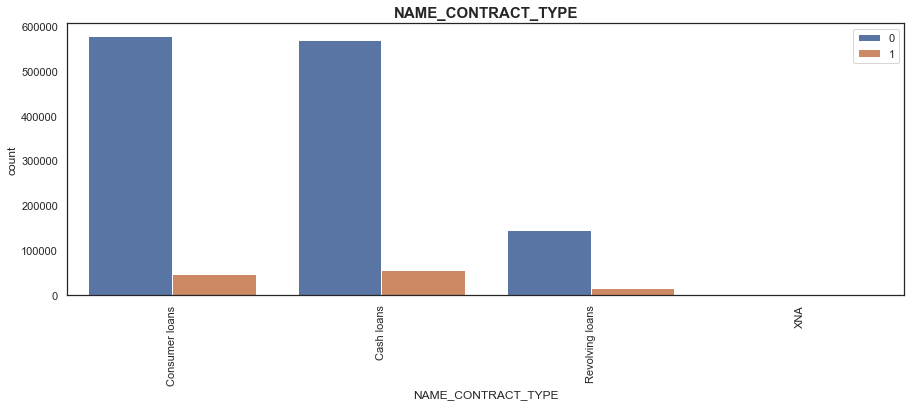

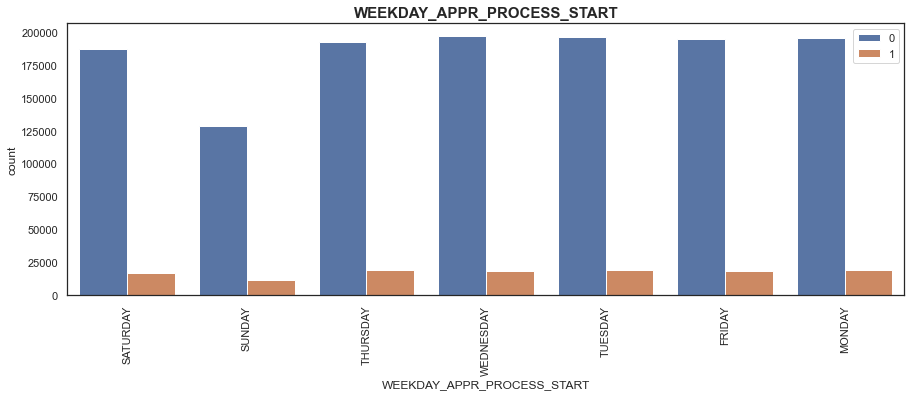

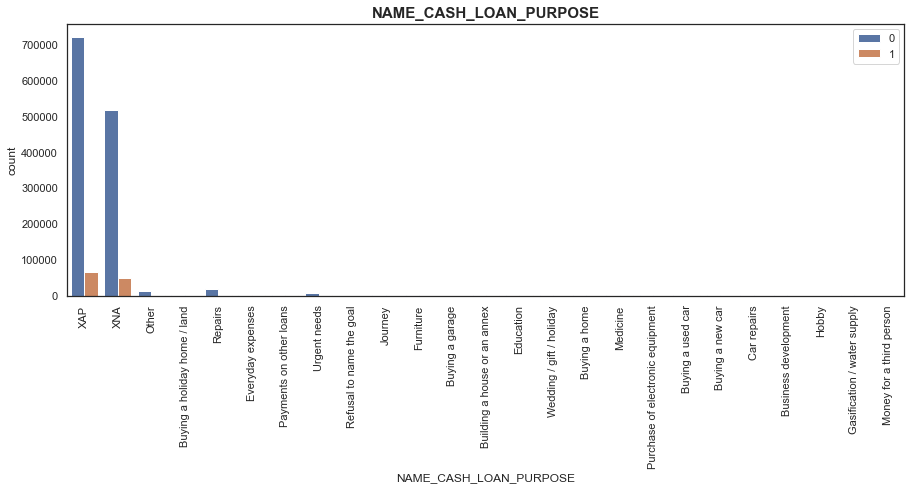

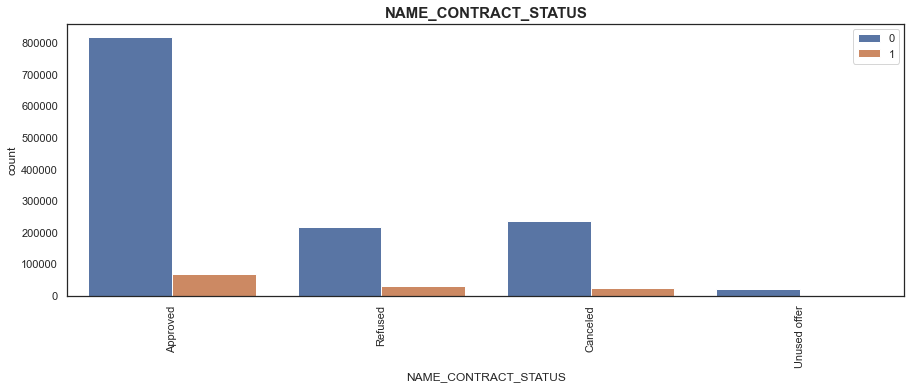

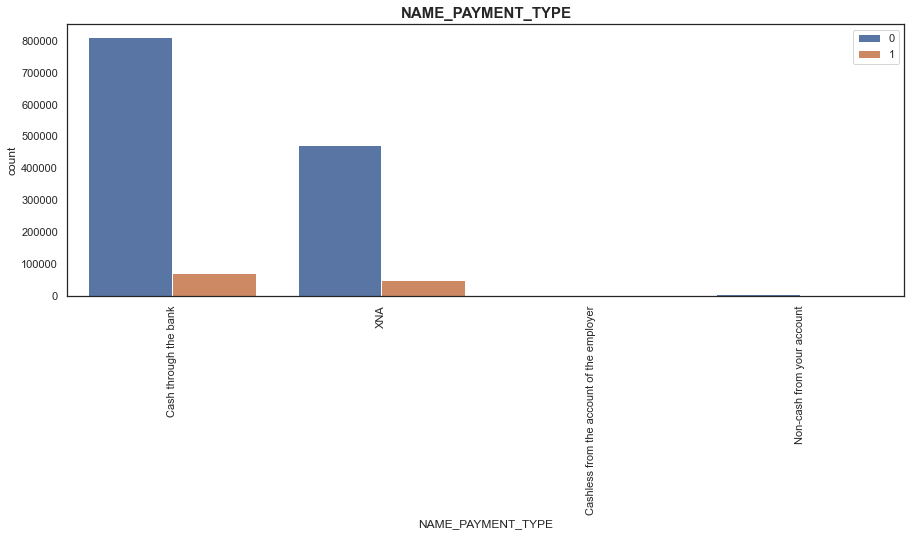

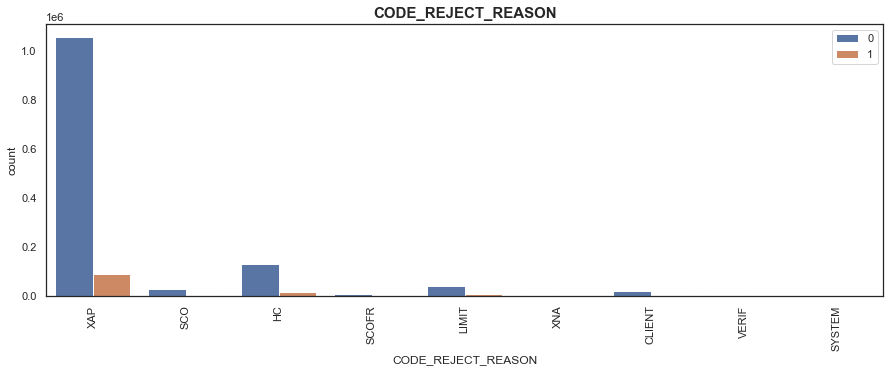

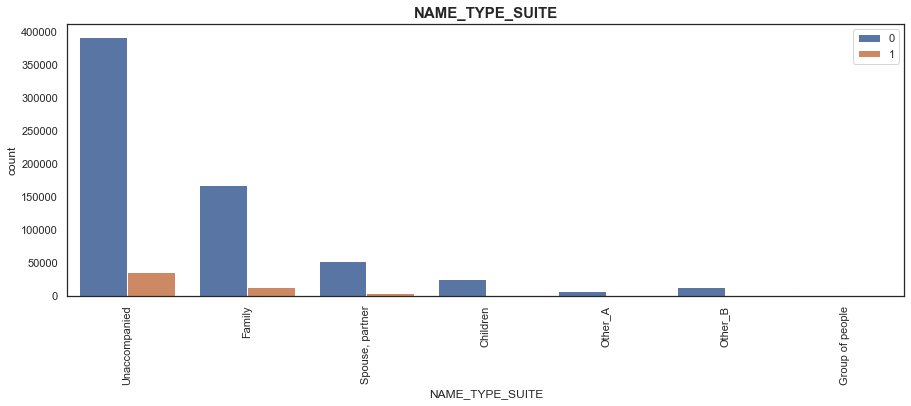

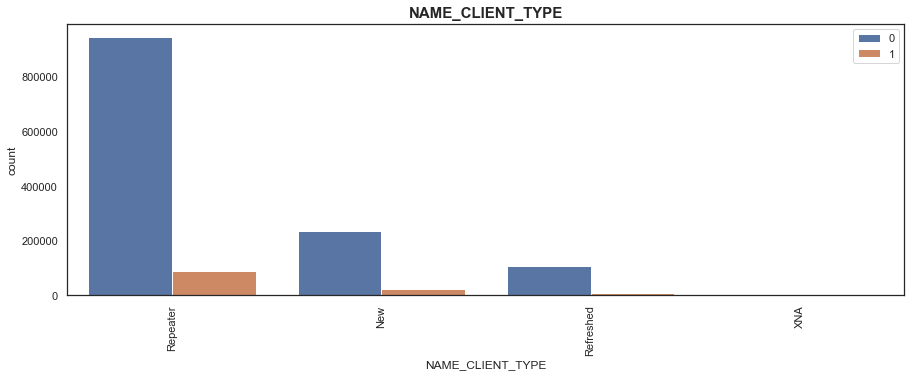

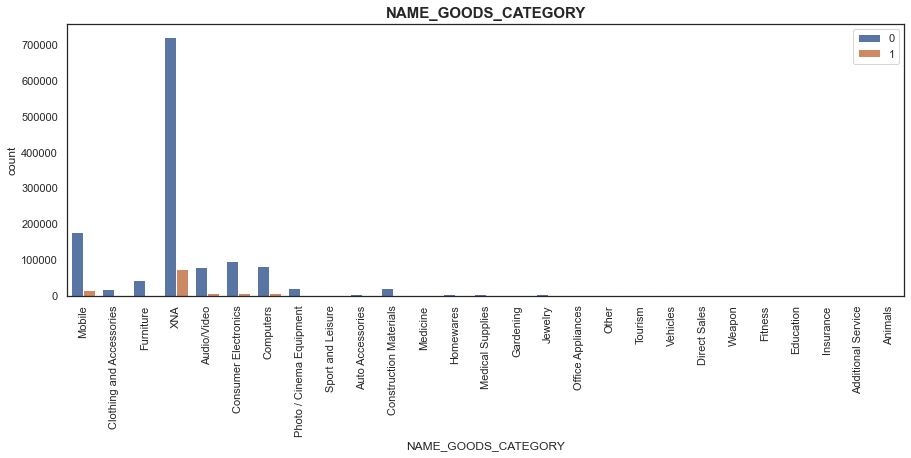

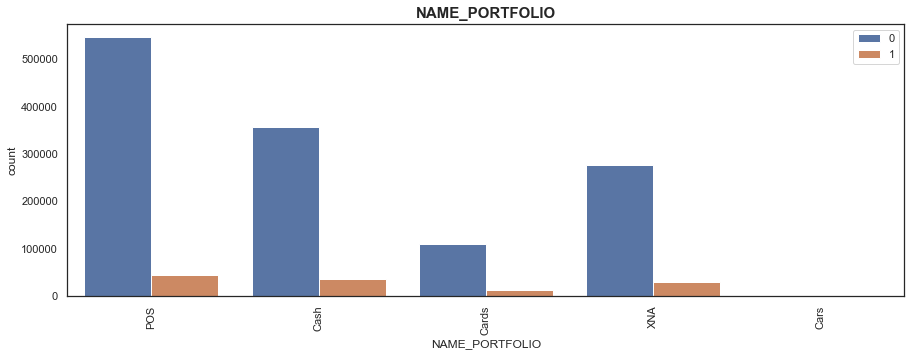

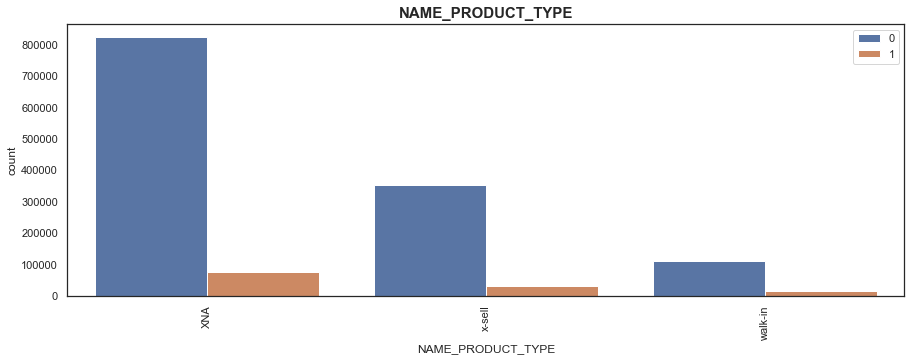

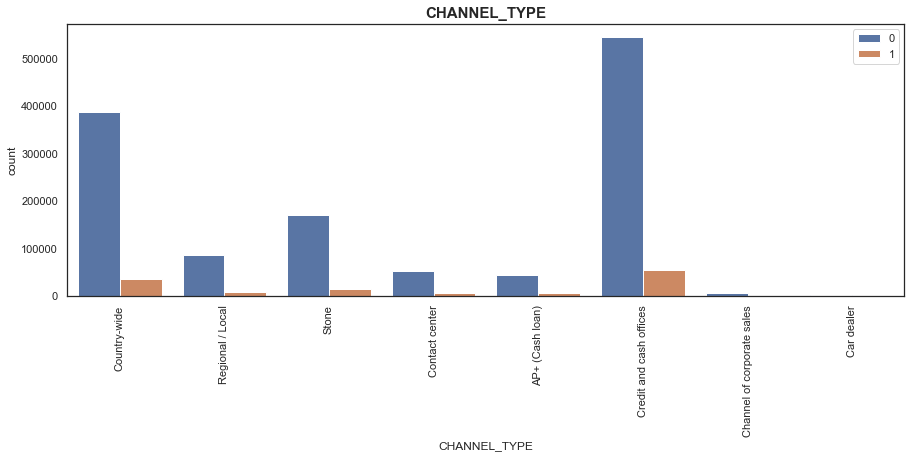

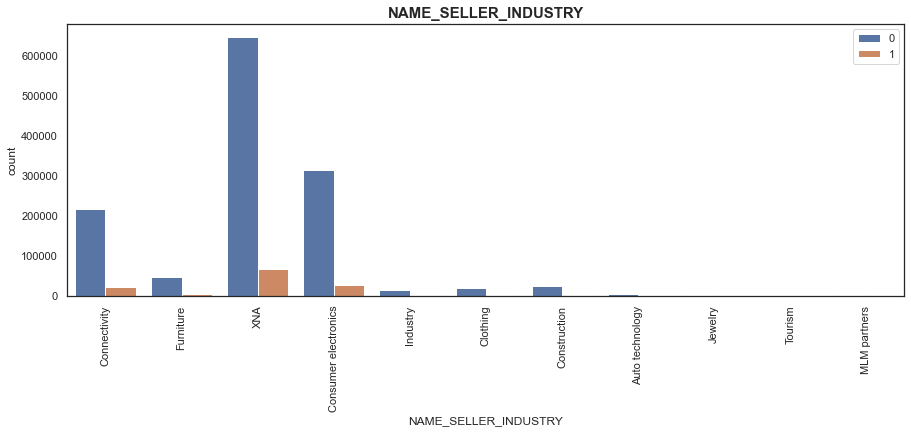

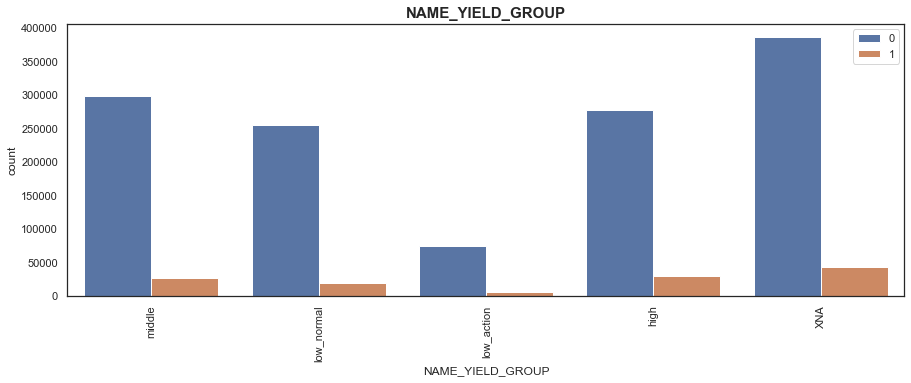

In [542]:
columns=['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']
for column in columns:
   plot_categorical(new_prev_app,column,title=column)

- Among defaulters,
    * Clients who opted consumer and cash loans are likely to be default
    * Clients with loan purpose XAP and XNA has more number of defaulters and Mostly rejected reason was XAP.
    * clients who are Repeaters are more in number than new clients.
    * clients acquired from channel credit and cash offices are more in number.
    * Clients who received high interest rates are more in number.
- Only some percent of defaulters application rejected and some are cancelled by client itself.


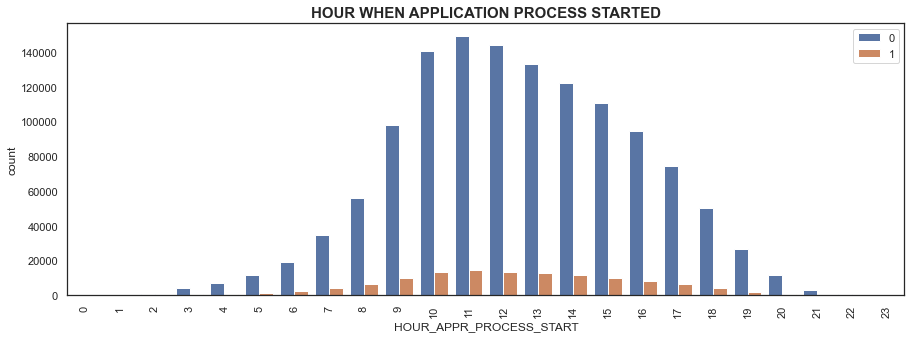

In [543]:
plot_categorical(new_prev_app,'HOUR_APPR_PROCESS_START',title='HOUR WHEN APPLICATION PROCESS STARTED')

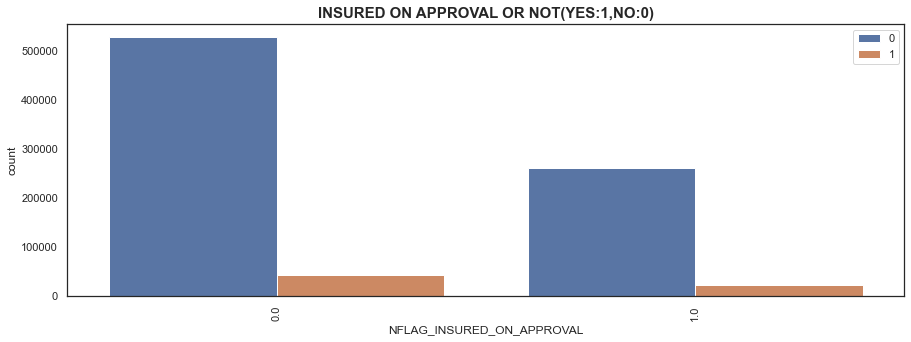

In [544]:
plot_categorical(new_prev_app,'NFLAG_INSURED_ON_APPROVAL',title='INSURED ON APPROVAL OR NOT(YES:1,NO:0)')

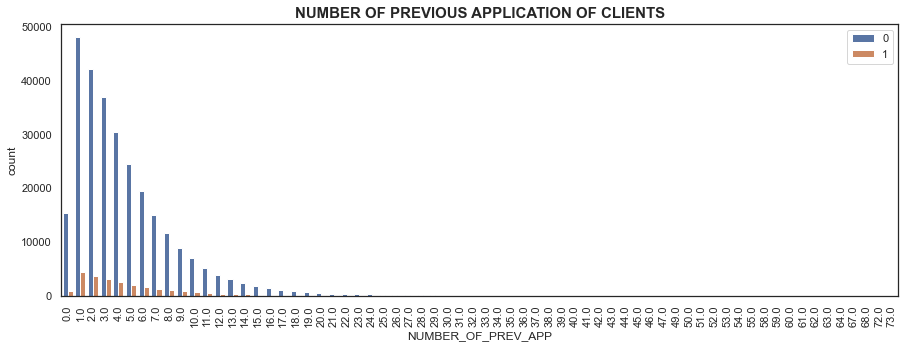

In [545]:
# FINDING AND PLOTTING NUMBER OF PREVIOUS APPLICATION OF EACH CLIENT
temp=prev_app
temp=temp.groupby(['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index(name='NUMBER_OF_PREV_APP')
APP_DATA=APP_DATA.merge(temp,on='SK_ID_CURR',how='left')
APP_DATA['NUMBER_OF_PREV_APP']=APP_DATA['NUMBER_OF_PREV_APP'].fillna(0)
plot_categorical(APP_DATA,'NUMBER_OF_PREV_APP',title='NUMBER OF PREVIOUS APPLICATION OF CLIENTS')

- clients who are repeaters and has higher number of previous application are less likely to be defaulter.

<Figure size 432x288 with 0 Axes>

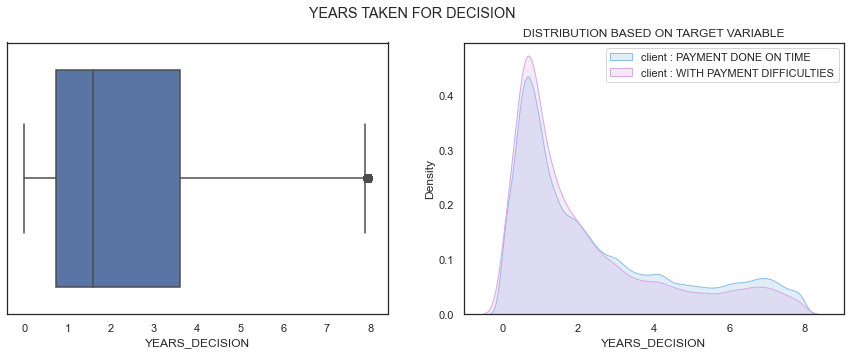

In [546]:
##Converting days to years for simplicity
new_prev_app['YEARS_DECISION']=(new_prev_app['DAYS_DECISION']/365.0)*(-1)
plot_dist(new_prev_app,'YEARS_DECISION',title='YEARS TAKEN FOR DECISION')

#### Finding correlation between variables

In [547]:
temp=new_prev_app
correlation_data_prev=pd.DataFrame(temp.corr()['TARGET'])
correlation_data_prev.columns=['correlation']
correlation_data_prev=correlation_data_prev.reset_index().sort_values(by='correlation',ascending=False)
correlation_data_prev

,index,correlation
19,TARGET,1.000000
10,DAYS_DECISION,0.039901
12,CNT_PAYMENT,0.023689
15,DAYS_LAST_DUE_1ST_VERSION,0.013317
16,DAYS_LAST_DUE,0.012799
17,DAYS_TERMINATION,0.012351
0,SK_ID_PREV,0.002009
18,NFLAG_INSURED_ON_APPROVAL,0.000653
6,AMT_GOODS_PRICE,0.000258
1,SK_ID_CURR,-0.001246


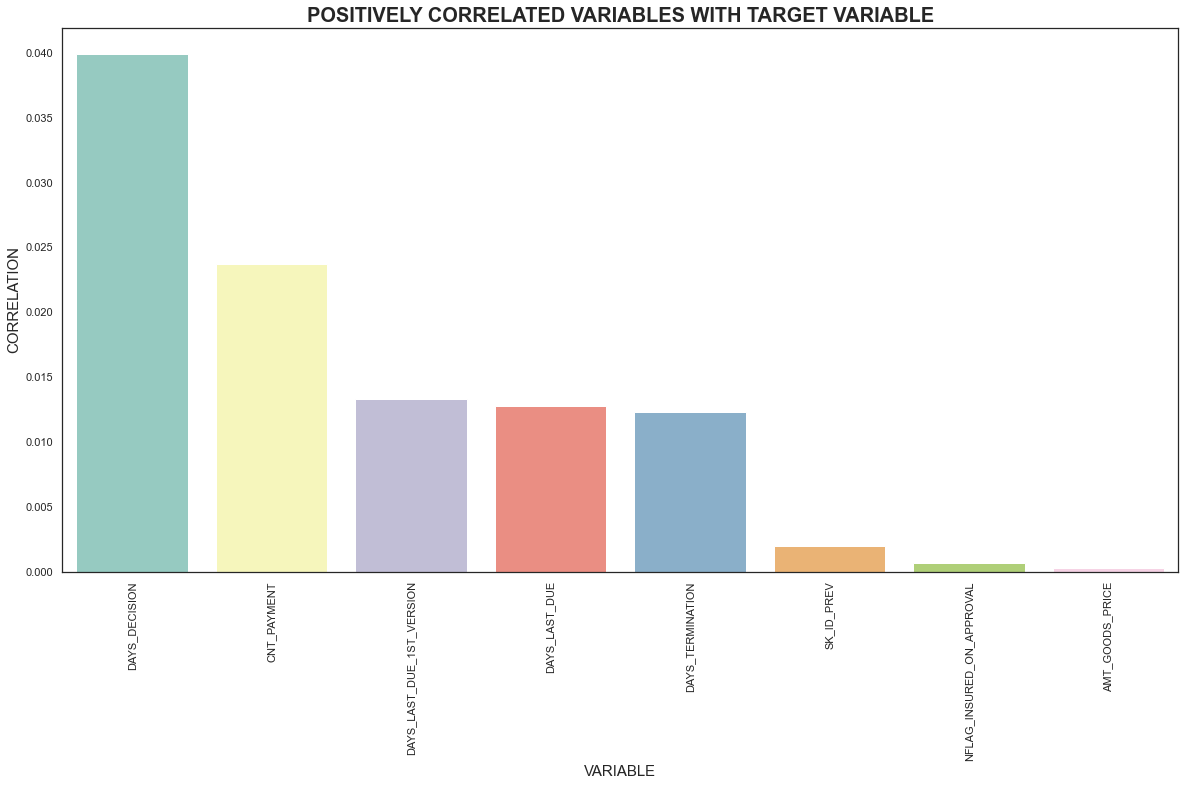

In [548]:
#FEATURES WITH HIGHEST CORRELATION WITH TARGET VARIABLE
plt.figure(figsize=(20,10))
sns.barplot(y='correlation',x='index',data=correlation_data_prev[correlation_data_prev.correlation>=0][1:],palette='Set3')
plt.xticks(rotation=90)
plt.title('POSITIVELY CORRELATED VARIABLES WITH TARGET VARIABLE',fontweight='bold',fontsize=20)
plt.xlabel('VARIABLE',fontsize=15)
plt.ylabel('CORRELATION',fontsize=15)
plt.show()

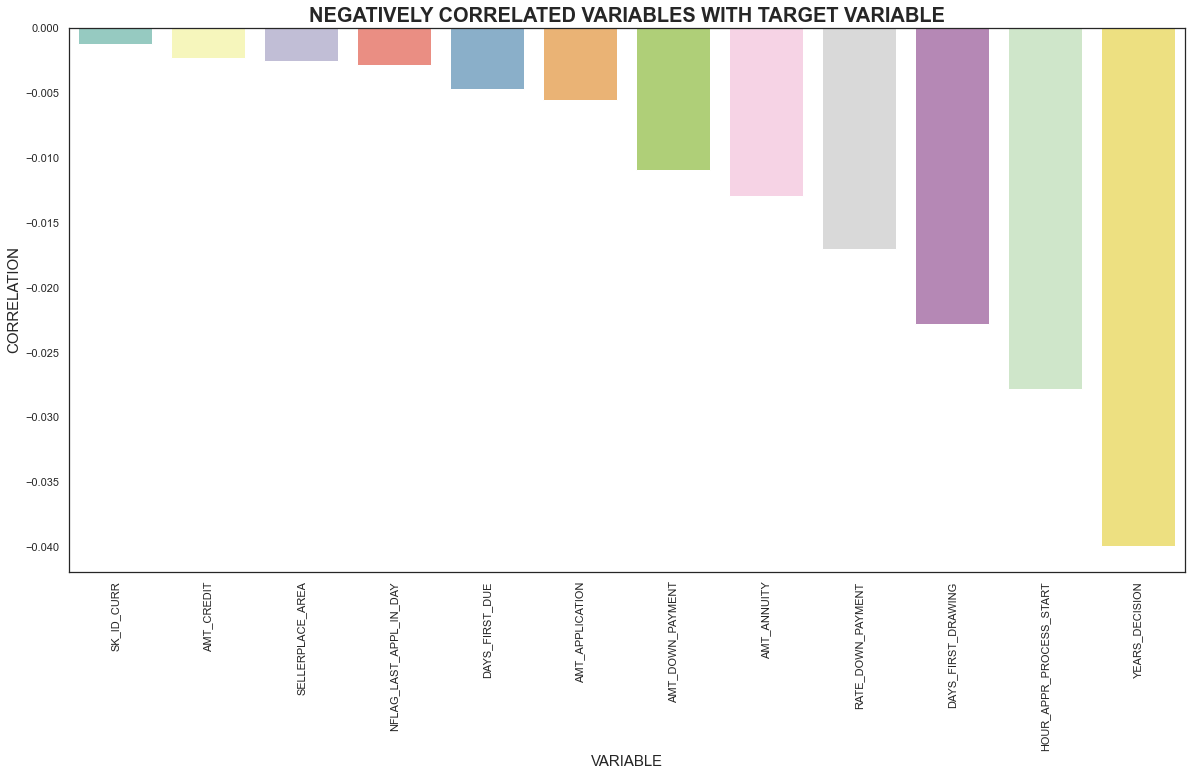

In [549]:
#FEATURES WITH LOWEST/NEGATIVE CORRELATION WITH TARGET VARIABLE
plt.figure(figsize=(20,10))
sns.barplot(y='correlation',x='index',data=correlation_data_prev[correlation_data_prev.correlation<0],palette='Set3')
plt.xticks(rotation=90)
plt.title('NEGATIVELY CORRELATED VARIABLES WITH TARGET VARIABLE',fontweight='bold',fontsize=20)
plt.xlabel('VARIABLE',fontsize=15)
plt.ylabel('CORRELATION',fontsize=15)
plt.show()

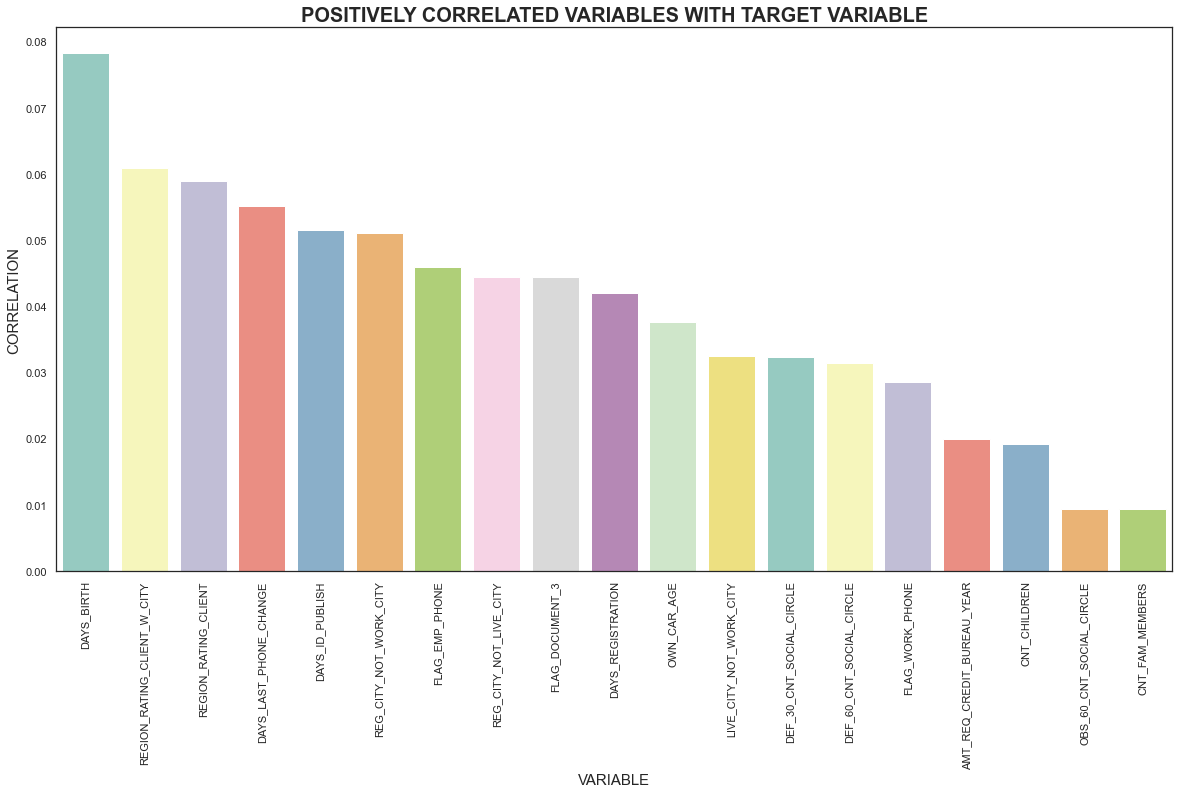

In [550]:
#FEATURES WITH HIGHEST CORRELATION WITH TARGET VARIABLE- APPLICATION DATA
correlation_data.head(20)
plt.figure(figsize=(20,10))
sns.barplot(y='correlation',x='index',data=correlation_data[1:20],palette='Set3')
plt.xticks(rotation=90)
plt.title('POSITIVELY CORRELATED VARIABLES WITH TARGET VARIABLE',fontweight='bold',fontsize=20)
plt.xlabel('VARIABLE',fontsize=15)
plt.ylabel('CORRELATION',fontsize=15)
plt.show()

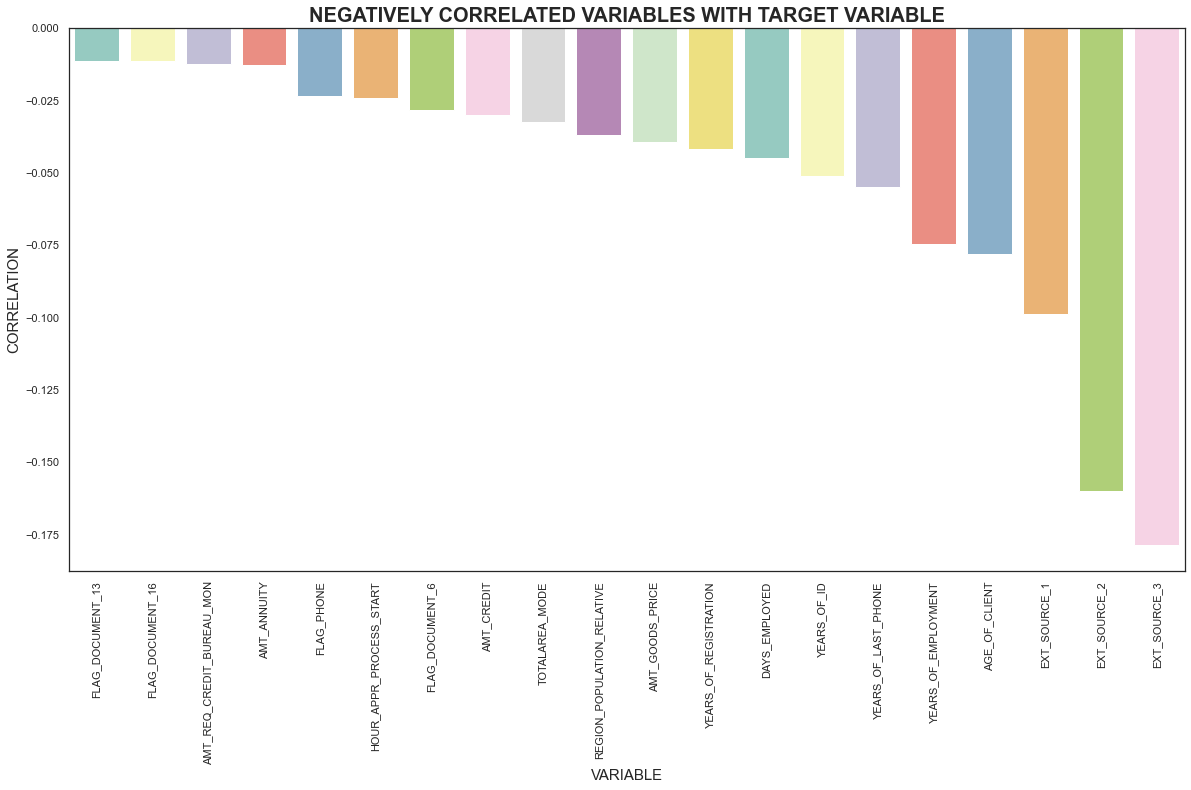

In [551]:
#FEATURES WITH LOWEST/NEGATIVE CORRELATION WITH TARGET VARIABLE - APPLICATION DATA
plt.figure(figsize=(20,10))
sns.barplot(y='correlation',x='index',data=correlation_data.tail(20),palette='Set3')
plt.xticks(rotation=90)
plt.title('NEGATIVELY CORRELATED VARIABLES WITH TARGET VARIABLE',fontweight='bold',fontsize=20)
plt.xlabel('VARIABLE',fontsize=15)
plt.ylabel('CORRELATION',fontsize=15)
plt.show()

- As we can see correlation of variables of both previous application data and application data, most of them match with our gained insights.
- DAYS_ID, DAYS_BIRTH.. etc because of their negative value they are in positively correlated.

#### TOP FEATURES WHICH ARE HIGHLY CORRELATED WITH TARGET VARIABLE(=1)
1) POSITIVELY CORRELATED FEATURES
- INCOME OF CLIENT
- REGION RATING(REGION WISE AND CITY WISE)
- YEARS OF EMPLOYMENT
- EDUCATION OF CLIENT

2) NEGATIVELY CORRELATED FEATURES
- EXT_SOURCE(1,2,3) FEATURE
- AGE OF CLIENT
- YEARS OF EMPLOYMENT
- YEARS SINCE LAST MOBILE PHONE CHANGE and ID PUBLISH

> THANK YOU!